<a href="https://colab.research.google.com/github/luctiz/Grupo43-TP1/blob/master/TP1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **00 - [START]Dependencias**

In [1]:
!apt-get install libgeos-3.5.0
!apt-get install libgeos-dev
!pip install https://github.com/matplotlib/basemap/archive/master.zip
!pip install geopandas

Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package libgeos-3.5.0
E: Couldn't find any package by glob 'libgeos-3.5.0'
E: Couldn't find any package by regex 'libgeos-3.5.0'
Reading package lists... Done
Building dependency tree       
Reading state information... Done
Suggested packages:
  libgdal-doc
The following NEW packages will be installed:
  libgeos-dev
0 upgraded, 1 newly installed, 0 to remove and 8 not upgraded.
Need to get 73.1 kB of archives.
After this operation, 486 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libgeos-dev amd64 3.6.2-1build2 [73.1 kB]
Fetched 73.1 kB in 0s (180 kB/s)
Selecting previously unselected package libgeos-dev.
(Reading database ... 131183 files and directories currently installed.)
Preparing to unpack .../libgeos-dev_3.6.2-1build2_amd64.deb ...
Unpacking libgeos-dev (3.6.2-1build2) ...
Setting up libgeos-dev (3.6.2-1bu

     |████████████████████████████████| 921kB 2.8MB/s 
     |████████████████████████████████| 11.9MB 606kB/s 
  Created wheel for munch: filename=munch-2.3.2-py2.py3-none-any.whl size=6614 sha256=9a635f8aa5f2a9dc4dd6755d4f0d132e598a37005137144611fc9174fd49f609
  Stored in directory: /root/.cache/pip/wheels/db/bf/bc/06a3e1bfe0ab27d2e720ceb3cff3159398d92644c0cec2c125
Successfully built munch


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gdp
from shapely.geometry import Point, Polygon
import folium,json
from mpl_toolkits.basemap import Basemap

'"import geopandas as gdp\nfrom shapely.geometry import Point, Polygon\nimport folium,json\nfrom mpl_toolkits.basemap import Basemap'

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


# **00 - [START] Validación de Datos**

In [8]:
df = pd.read_csv('gdrive/My Drive/Colab Notebooks/train.csv', dtype = {'piscina':'int32', 'gimnasio':'int32', 'usosmultiples':'int32', 'escuelascercanas':'int32',
                                         'centroscomercialescercanos':'int32', 'precio':'int32', 'id':'int32'},parse_dates = ['fecha'])

In [9]:
# Me guardo una versión del dataframe con NaNs
data_original = df
#Quito todos los NaN y los pasa a valor 0
df = df.replace(np.nan, 0)

In [0]:
#Continuar casteando valores que ocupan demasiada memoria (ahora puedo hacerlo en aquellos que tenian NaN)
df = df.astype({'banos':'int32', 'antiguedad':'int32', 'garages':'int32', 'habitaciones':'int32', 'metroscubiertos':'int32', 'metrostotales':'int32',
                    'idzona':'int32'})

In [0]:
#Establecer como category el tipo de propiedad
categorias = df['tipodepropiedad']
categorias = categorias.astype('category').dtypes
df = df.astype({'tipodepropiedad':'category'})

In [8]:
print('Numero de columnas',df.shape)

Numero de columnas (240000, 23)


In [9]:
print('Numero de filas por columnas',df.size)

Numero de filas por columnas 5520000


In [10]:
print('Numero de Elementos',df.count())

Numero de Elementos id                            240000
titulo                        240000
descripcion                   240000
tipodepropiedad               240000
direccion                     240000
ciudad                        240000
provincia                     240000
antiguedad                    240000
habitaciones                  240000
garages                       240000
banos                         240000
metroscubiertos               240000
metrostotales                 240000
idzona                        240000
lat                           240000
lng                           240000
fecha                         240000
gimnasio                      240000
usosmultiples                 240000
piscina                       240000
escuelascercanas              240000
centroscomercialescercanos    240000
precio                        240000
dtype: int64


In [11]:
print('Analisis de tipos',df.dtypes)

Analisis de tipos id                                     int32
titulo                                object
descripcion                           object
tipodepropiedad                     category
direccion                             object
ciudad                                object
provincia                             object
antiguedad                             int32
habitaciones                           int32
garages                                int32
banos                                  int32
metroscubiertos                        int32
metrostotales                          int32
idzona                                 int32
lat                                  float64
lng                                  float64
fecha                         datetime64[ns]
gimnasio                               int32
usosmultiples                          int32
piscina                                int32
escuelascercanas                       int32
centroscomercialescercanos           

In [12]:
#Se redujo el uso de memoria de 45MB a 27MB aproximadamente
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240000 entries, 0 to 239999
Data columns (total 23 columns):
id                            240000 non-null int32
titulo                        240000 non-null object
descripcion                   240000 non-null object
tipodepropiedad               240000 non-null category
direccion                     240000 non-null object
ciudad                        240000 non-null object
provincia                     240000 non-null object
antiguedad                    240000 non-null int32
habitaciones                  240000 non-null int32
garages                       240000 non-null int32
banos                         240000 non-null int32
metroscubiertos               240000 non-null int32
metrostotales                 240000 non-null int32
idzona                        240000 non-null int32
lat                           240000 non-null float64
lng                           240000 non-null float64
fecha                         240000 non-null

# **1.0 - [COORDENADAS] Análisis Cartográficos**

In [0]:
from matplotlib.colors import Normalize
import matplotlib.colors as colors
from numpy import array
from numpy import max

In [0]:
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
sns.set(style="white", color_codes=True)

In [0]:
df = df.drop([0],axis=0) #Elimino los tipos 0 que desconozco que clase de propiedad son

In [0]:
# Creamos la lista de latitudes y longitudes.
lats, lons = list(df['lat']), list(df['lng'])

In [0]:
lat = 23
lon = -102

# 1.0 - [COORDENADAS] ANÁLISIS GLOBAL

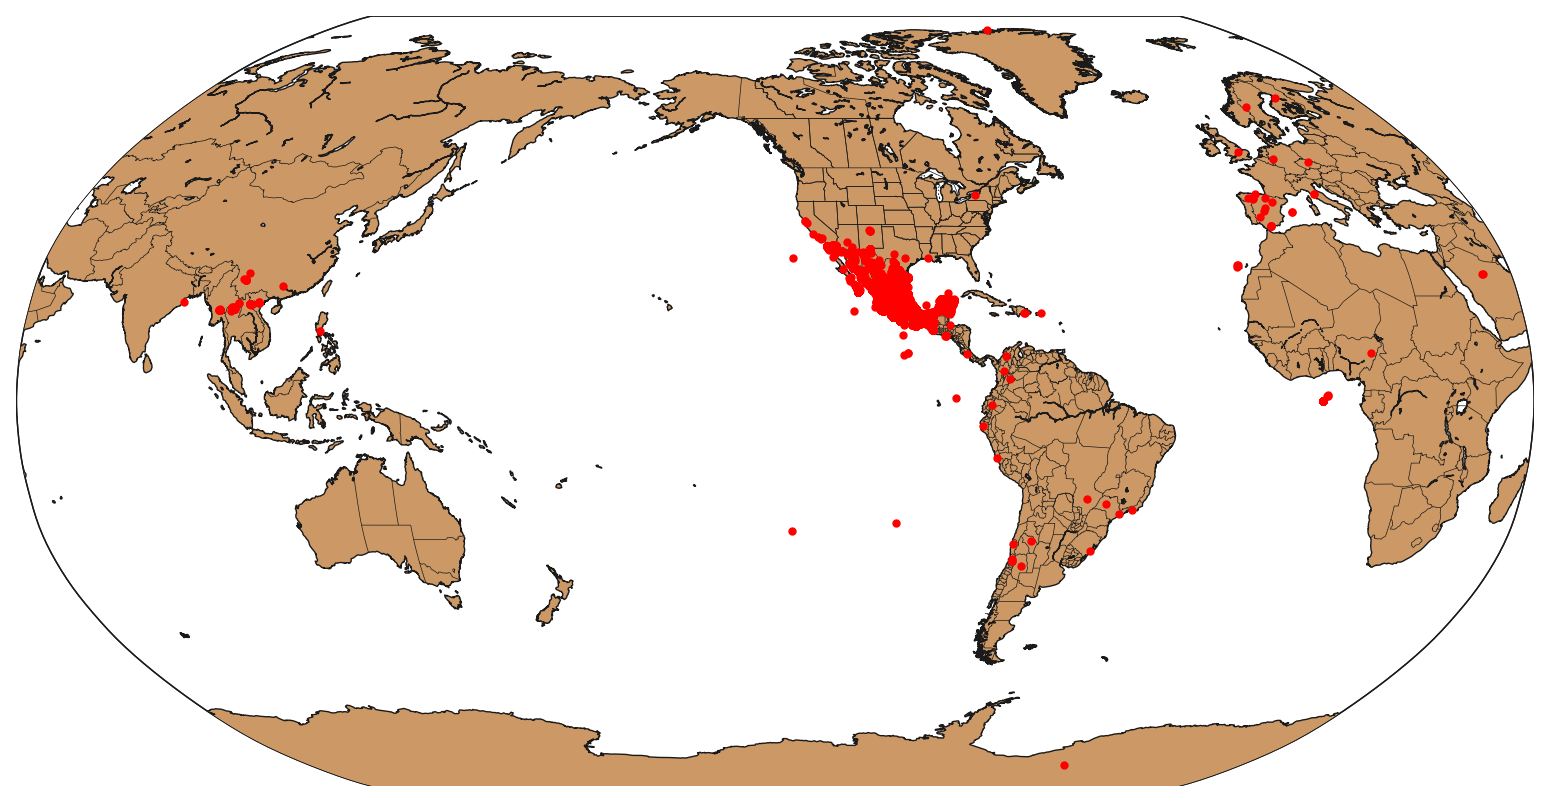

In [156]:
##Analizo sobre todo el planisferio todas las publicaciones
figu, ax = plt.subplots(figsize=(20,10))
eq_map0 = Basemap(projection='robin', resolution = 'l', area_thresh = 1000.0,
              lat_0=0, lon_0=-130)
eq_map0.drawcoastlines()
eq_map0.drawcountries()
eq_map0.fillcontinents(color = '#cc9966')
eq_map0.drawmapboundary()
eq_map0.drawstates()

## Coordenadas a posiciones
x,y = eq_map0(lons, lats)
eq_map0.plot(x, y, 'o',c='red', markersize=5)

plt.show()

  Tras el plot anterior podemos observar que una amplia cantidad de ubicaciones presentan coordenadas que se encuentran tanto  dentro  como fuera del país de mexico. Y no solamente ello, sino que también hay publicaiones cuyas coordenadas no coinciden con territorio continental o islas, sino que se encuentran en el medio del mar u oceanos. 
  Un análisis simple podría indicar una cantidad bastante similar en el continente europeo, latinoamerica y asia Oriental.
Con respecto a Oceanía, europa oriental y medio Oriente practicamente no presentan publicaiones.
  Solamente Africa y Arabia Saudita se destaca por apenas una o dos publicaciones a simple vista. Esto amerita analizar en detalle la cantidad exacta de publicaciones en el exterior de Mexico.

# 1.2 - [COORDENADAS] Análisis de publicaciones sobre Mexico

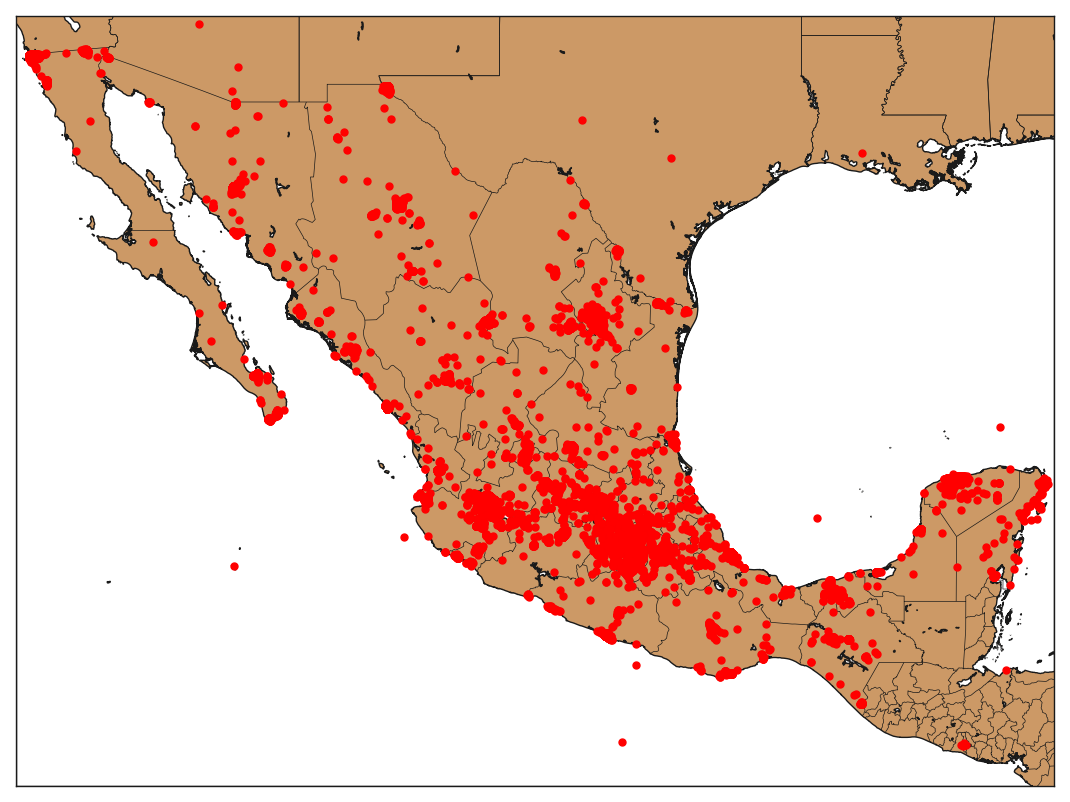

In [157]:
##Analizo sobre Mexico todas las publicaciones
figu, ax = plt.subplots(figsize=(20,10))
eq_map = Basemap(projection='merc',
                  lat_0 = 23, lon_0 = -102,
                  resolution = 'h', area_thresh = 0.1,
                  llcrnrlon=lon-15.5, llcrnrlat=lat-10.5,
                  urcrnrlon=lon+15.5, urcrnrlat=lat+10.5)
eq_map.drawcoastlines()
eq_map.drawcountries()
eq_map.fillcontinents(color = '#cc9966')
eq_map.drawmapboundary()
eq_map.drawstates()

## Coordenadas a posiciones
x,y = eq_map(lons, lats)
eq_map.plot(x, y, 'o',c='red', markersize=5)

plt.show()

La ciudad de Mexico y los estados en los alrededores acaparan la mayor cantidad de  publicaiones. Estos pueden verse principalmente en la zona media del país. Por otro lado las zonas abarcadas por aquellos estados aledaños tanto en el sur o el norte presentan mayoritariamente  ubicaciones sobre sus respectivas capitales.

# 1.2 [COORDENADAS] Análisis sobre Mexico de las Publicaciones mas Populares

In [0]:
casas = df[df['tipodepropiedad']=='Casa']
apartamentos = df[df['tipodepropiedad']=='Apartamento']
condominios = df[df['tipodepropiedad']=='Casa en condominio']
terrenos = df[df['tipodepropiedad']=='Terrenos']
comercios = df[df['tipodepropiedad']=='Local Comercial']

In [0]:
# Creamos la lista de latitudes y longitudes.
lats, lons = list(casas['lat']), list(casas['lng'])
lats1, lons1 = list(apartamentos['lat']), list(apartamentos['lng'])
lats2, lons2 = list(condominios['lat']), list(condominios['lng'])
lats3, lons3 = list(terrenos['lat']), list(terrenos['lng'])
lats4, lons4 = list(comercios['lat']), list(comercios['lng'])

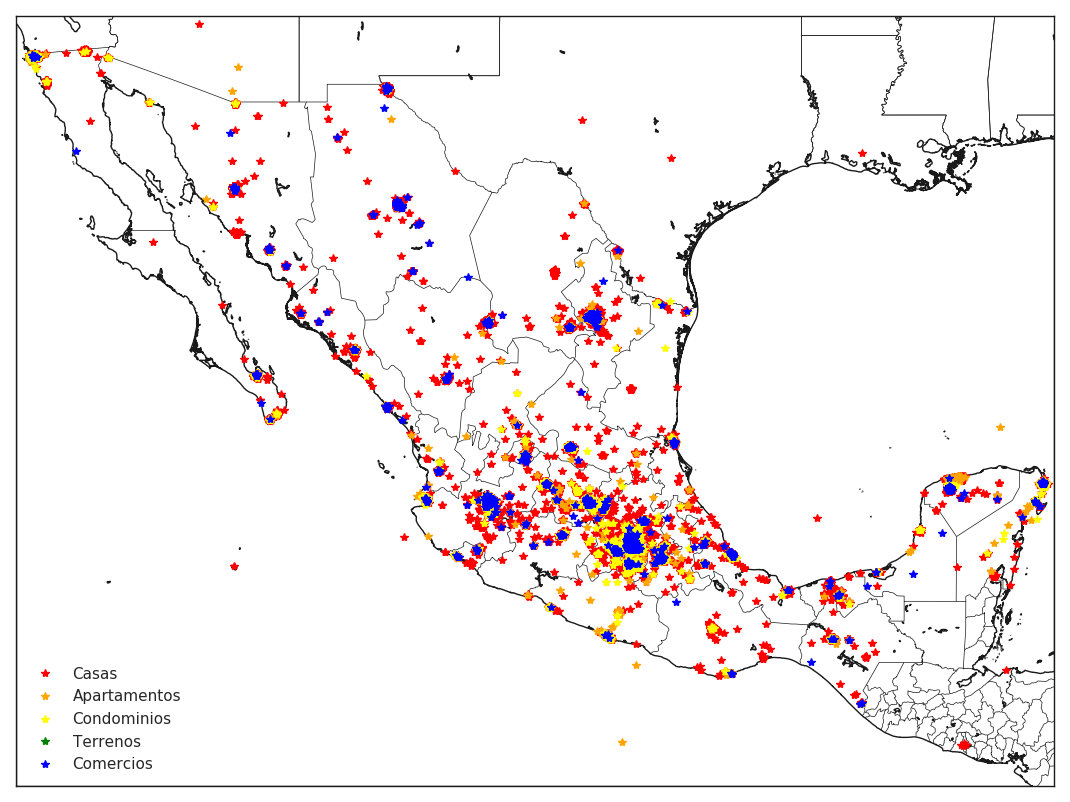

In [172]:
##Analisis de las 5 publicaciones mas comunes

from matplotlib.patches import Polygon

figu2, ax = plt.subplots(figsize=(20,10))
eq_map3 = Basemap(projection='merc',
                  lat_0 = 23, lon_0 = -102,
                  resolution = 'h', area_thresh = 0.1,
                  llcrnrlon=lon-15.5, llcrnrlat=lat-10.5,
                  urcrnrlon=lon+15.5, urcrnrlat=lat+10.5)
eq_map3.drawcoastlines()
eq_map3.drawcountries()
eq_map3.fillcontinents(color = 'white')
eq_map3.drawmapboundary()
eq_map3.drawstates()

## Coordenadas a posiciones
a,b = eq_map3(lons, lats)
eq_map3.plot(a, b, '*',c='red', markersize=6, label="Casas")

a,b = eq_map3(lons1, lats1)
eq_map3.plot(a, b, '*',c='orange', markersize=6, label="Apartamentos")

a,b = eq_map3(lons2, lats2)
eq_map3.plot(a, b, '*',c='yellow', markersize=6, label="Condominios")

a,b = eq_map3(lons3, lats3)
eq_map3.plot(a, b, '*',c='green', markersize=6, label="Terrenos")

a,b = eq_map3(lons4, lats4)
eq_map3.plot(a, b, '*',c='blue', markersize=6, label="Comercios")

handles, labels = plt.gca().get_legend_handles_labels()                    
plt.legend(handles=handles, labels=labels)

plt.legend(loc=3)
plt.show()

# **2.1 - [PRECIOS] Análisis de Tipo de Propiedades VS Precio**

In [23]:
df['tipodepropiedad'].value_counts()

Casa                             141717
Apartamento                       57340
Casa en condominio                19297
Terreno                            9945
Local Comercial                    3055
Oficina comercial                  1741
Bodega comercial                   1406
Edificio                           1396
Terreno comercial                  1326
Casa uso de suelo                   708
Quinta Vacacional                   395
Duplex                              343
Villa                               340
Inmuebles productivos urbanos       200
Rancho                              170
Local en centro comercial           165
Departamento Compartido             141
Otros                               134
Nave industrial                      76
0                                    46
Terreno industrial                   31
Huerta                               20
Lote                                  5
Hospedaje                             1
Garage                                1


In [0]:
result = df.groupby(["tipodepropiedad"])['precio'].aggregate(np.median).reset_index().sort_values('precio')

In [25]:
result.head()

,tipodepropiedad,precio
9,Garage,500000
7,Duplex,668000
15,Lote,702100
21,Terreno,1100000
0,0,1497500


In [0]:
result = result.drop([0],axis=0) #Elimino los tipos 0 que desconozco que clase de propiedad son (NO me sirven para comparar porque puede ser cualquier cosa)

Text(0, 0.5, 'Tipo de Propiedad')

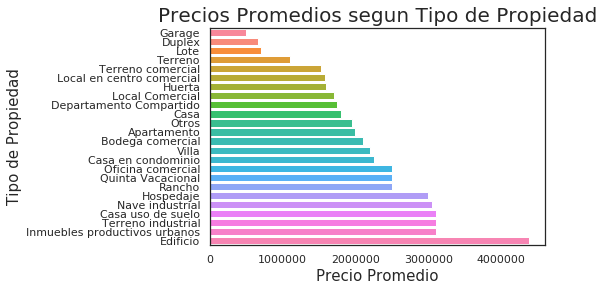

In [27]:
g = sns.barplot( x='precio', y= 'tipodepropiedad', data = result, order=result['tipodepropiedad'], orient = 'h',saturation = 1000)
g.set_title("Precios Promedios segun Tipo de Propiedad", fontsize=20)
g.set_xlabel("Precio Promedio", fontsize=15)
g.set_ylabel("Tipo de Propiedad", fontsize=15)

# **2.2 - [PRECIOS] Tipo de Propiedades vs popularidad por provincias y precios**

In [0]:
# Veo cuales son las propiedades más populares
propiedadesXtipos = df.tipodepropiedad.value_counts().nlargest(10)

In [0]:
tipos_populares = propiedadesXtipos.index

#Provincias más populares
popiedadesXprovincia = df.provincia.value_counts().nlargest(10)

In [0]:
provincias_populares = popiedadesXprovincia.index

In [0]:
#Tipo de propiedad vs precios promedios
tipoVSprecio = df[['id', 'tipodepropiedad', 'precio', 'provincia']].groupby(['provincia', 'tipodepropiedad']).agg({'id': 'count', 'precio': 'mean'}).reset_index().sort_values(by = ['id'], ascending = False)
#Tomo sólo los 10 tipos de propiedad y provincias más populares
tipoVSprecio_mas = tipoVSprecio.loc[(tipoVSprecio.provincia.isin(provincias_populares)) & (tipoVSprecio.tipodepropiedad.isin(tipos_populares))]

In [32]:
tablaHeatMap = pd.pivot_table(tipoVSprecio_mas, values = 'precio', index = 'tipodepropiedad', columns = 'provincia')
tablaHeatMap



provincia,Distrito Federal,Edo. de México,Jalisco,Morelos,Nuevo León,Puebla,Querétaro,San luis Potosí,Veracruz,Yucatán
tipodepropiedad,,,,,,,,,,
Apartamento,2.919103e+06,2.881501e+06,2.520902e+06,1.574236e+06,3.860282e+06,1.860751e+06,1.945329e+06,1.671470e+06,1.940036e+06,2.336429e+06
Bodega comercial,4.272932e+06,2.749083e+06,2.310573e+06,2.480000e+06,2.233120e+06,2.482700e+06,2.013162e+06,2.001956e+06,1.856329e+06,1.541557e+06
Casa,4.037017e+06,2.792133e+06,2.325363e+06,2.595663e+06,2.568358e+06,2.391779e+06,2.309959e+06,2.032427e+06,1.921550e+06,1.992796e+06
Casa en condominio,4.811713e+06,2.484096e+06,2.627604e+06,1.801653e+06,2.701284e+06,2.692794e+06,2.120155e+06,2.266716e+06,1.488363e+06,2.633705e+06
Casa uso de suelo,5.321922e+06,3.135521e+06,2.729746e+06,3.292401e+06,2.585438e+06,2.668182e+06,3.235852e+06,2.444000e+06,3.675000e+06,2.488077e+06
Edificio,5.951535e+06,4.820201e+06,4.911477e+06,3.938667e+06,3.617602e+06,4.947077e+06,4.353530e+06,5.465400e+06,3.963292e+06,3.272906e+06
Local Comercial,3.178273e+06,2.764283e+06,2.349532e+06,2.512158e+06,2.440365e+06,2.293458e+06,1.898338e+06,2.032394e+06,2.521488e+06,2.081840e+06
Oficina comercial,3.647538e+06,3.334818e+06,3.837927e+06,2.064219e+06,3.231270e+06,2.708164e+06,2.277341e+06,1.888526e+06,2.696753e+06,1.945090e+06
Terreno,4.066719e+06,1.871082e+06,1.766575e+06,1.477136e+06,1.841704e+06,1.330743e+06,8.709473e+05,1.360701e+06,1.066838e+06,1.280037e+06


Text(0.5, 30.5, 'Provincia')

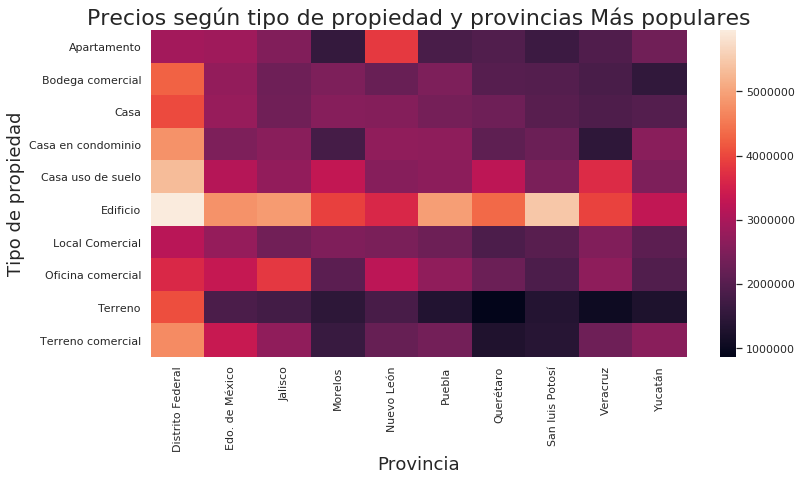

In [33]:
plt.figure(figsize = (12,6))
graf = sns.heatmap(tablaHeatMap)
graf.set_title('Precios según tipo de propiedad y provincias Más populares', fontsize =  22)
graf.set_ylabel('Tipo de propiedad', fontsize = 18)
graf.set_xlabel('Provincia', fontsize = 18)

# **2.3 - [PRECIOS] ¿Cómo se distribuye el precio en las ciudades más populares?**

(array([-2000000.,        0.,  2000000.,  4000000.,  6000000.,  8000000.,
        10000000., 12000000., 14000000.]),
 <a list of 9 Text yticklabel objects>)

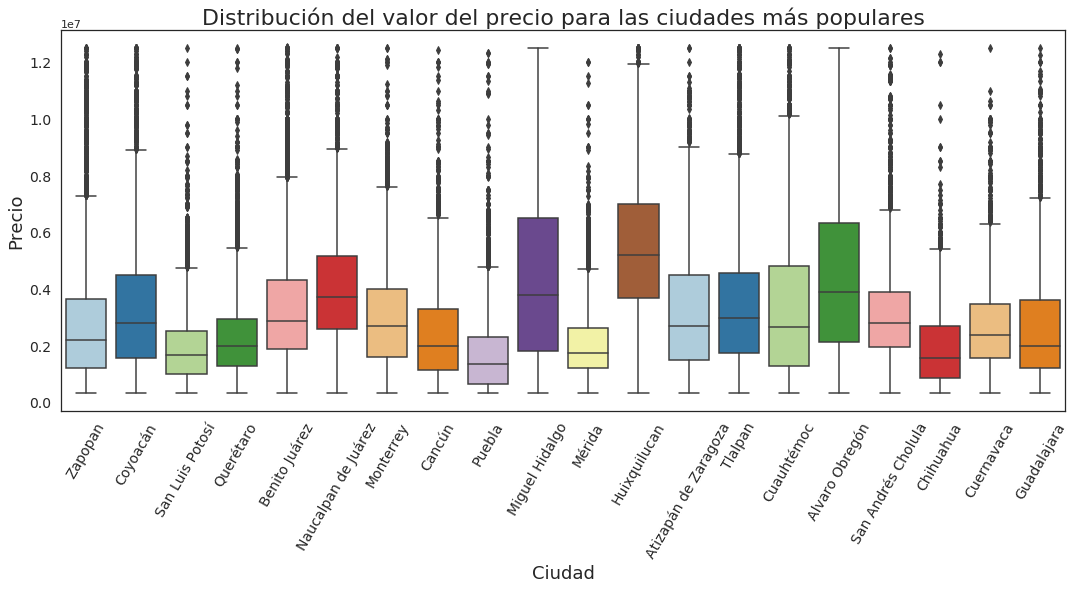

In [34]:
ciudades_populares = df.ciudad.value_counts().head(20).index
precios_ciudades_pop = df.loc[df.ciudad.isin(ciudades_populares), ['precio', 'ciudad']]
plt.figure(figsize = (18,7))
grafico = sns.boxplot( x=precios_ciudades_pop["ciudad"], y=precios_ciudades_pop["precio"], palette="Paired")
grafico.set_xticklabels(grafico.get_xticklabels(),rotation=60)
grafico.set_title('Distribución del valor del precio para las ciudades más populares', fontsize =  22)
grafico.set_ylabel('Precio', fontsize = 18)
grafico.set_xlabel('Ciudad', fontsize = 18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# **2.4 - [PRECIOS] ¿Qué pasa con el precio según las características de los inmuebles?**

In [0]:
data_con_caracteristicas = data_original.dropna().iloc[:, [0,17,18,19,20,21,22]]
data_con_caracteristicas = data_con_caracteristicas.melt(id_vars = ['id', 'precio'], value_vars = ['gimnasio', 'usosmultiples', 'piscina', 'escuelascercanas', 'centroscomercialescercanos'], var_name = 'caracteristica', value_name = 'si/no')

In [0]:
data_con_caracteristicas = data_con_caracteristicas.loc[data_con_caracteristicas['si/no'] != 0]

In [37]:
data_con_caracteristicas.groupby('caracteristica').agg({'id':'count', 'precio':'mean'})

,id,precio
caracteristica,,
centroscomercialescercanos,31948,2.272573e+06
escuelascercanas,33486,2.219112e+06
gimnasio,3494,3.731120e+06
piscina,4728,3.130244e+06
usosmultiples,3996,3.345267e+06


In [0]:
data_con_caracteristicas['cantidad'] = data_con_caracteristicas[['precio', 'caracteristica', 'si/no']].groupby(['precio', 'caracteristica']).transform(lambda x: x.sum())

Text(0, 0.5, 'Cantidad de Publicaciones')

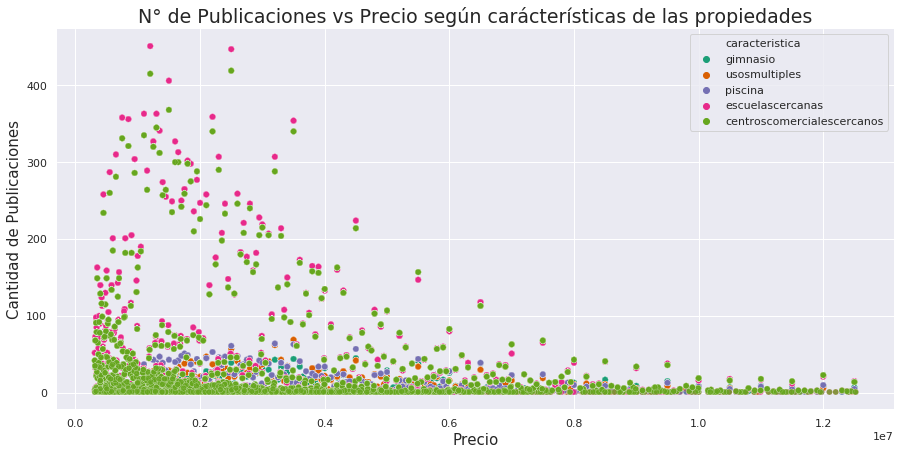

In [39]:
sns.set(style="darkgrid")
f, ax = plt.subplots(figsize=(15, 7))
sns.despine(f, left=True, bottom=True)
g = sns.scatterplot(x="precio", y="cantidad",
                hue="caracteristica",
                palette="Dark2", linewidth=0.25,
                data=data_con_caracteristicas, ax=ax, alpha = 0.75)
g.set_title('N° de Publicaciones vs Precio según carácterísticas de las propiedades', fontsize = 19)
g.set_xlabel('Precio', fontsize = 15)
g.set_ylabel('Cantidad de Publicaciones', fontsize = 15)

**Conclusión Parcial**

Vemos como las propiedades con centros comerciales cercanos y con escuelas cercanas tienen un comportamiento bastante parecido, esto también se debe a que sean las más populares, pero además son cualidades importantes a la hora de decidir sobre la adquisición de una propiedad. Vemos que hay una poca cantidad de publicaciones con precios super variados, desde bajos hasta muy altos, pero a medida que la cantidad de publicaciones aumenta el precio comienza a disminuir, por lo que parecen ser mucho más populares las publicaciones de propiedades que posean éstas características y se encuentren a un precio relativamente bajo.

# 2.5 - [PRECIOS] Precios VS Antiguedad

In [10]:
precio_antiguedad = data_original[['precio', 'antiguedad', 'id']].loc[~(df.antiguedad.isnull())].groupby('antiguedad').agg({'precio': 'mean', 'id':'count'}).reset_index()

In [11]:
#Voy a filtrar las antiguedades que contengan menos de 100 publicaciones, así evitamos a la "ecuación más peligros del mundo"
precio_antiguedad = precio_antiguedad.loc[precio_antiguedad.id >= 100]

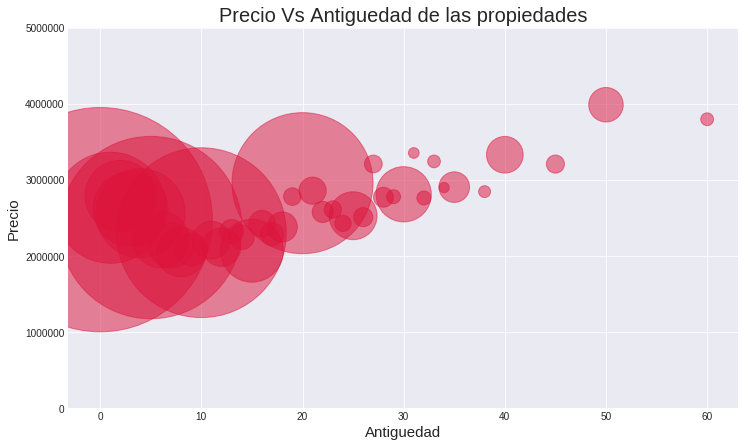

In [12]:
plt.figure(figsize = (12,7))
plt.style.use('seaborn-darkgrid')
plt.scatter(precio_antiguedad['antiguedad'], precio_antiguedad['precio'], s = precio_antiguedad['id'], color = 'crimson', alpha = 0.5)
plt.xlabel('Antiguedad', fontsize = 15)
plt.ylabel('Precio', fontsize = 15)
plt.ylim(0,5000000)
plt.title('Precio Vs Antiguedad de las propiedades', fontsize = 20)
plt.show()

**Conclusión Parcial**

Vemos como las propiedades con una antiguedad entre 0 y 10 años tienen una grán cantidad de publicaciones registradas y precios mucho más variables que se encuentran por debajo de los 4 millones de pesos mexicanos, aunque si observamos bien, tenemos un aglutinamiento de propiedades que se encuentran por debajo de los 20 años de antiguedad, cuyo precio escala sólo un poco por encima de los 3 millones. Luego si nos movemos a propiedades que se encuentran entre los 15 años hasta casi los 30 años de antiguedad, el precio varía un poco menos, pues son menos publicaciones y se encuentran entre un rango de 2 a 3.5 millones de pesos mexicacnos.
Por ultimo observamos como a medida que se superan los 30 años de antiguedad el precio va en aumento, vemos que hay ciertas propiedades rondando los 50 años de antiguedad y que son bastante costosas, así tambien vemos que el número de publicaciones disminuye, por lo que las casas con mayor antiguedad son menos populares entre las publicaciones.

# 3.0 - [DESCRIPCIONES] Agrupacion de Datos por Precio (GRUPO I,II y III)

In [0]:
import calendar

In [0]:
%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
plt.rcParams['figure.figsize'] = (10, 6)

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

sns.set(rc={'figure.figsize':(11.7,8.27)})

[[<matplotlib.axis.XTick at 0x7f3c29e28470>,

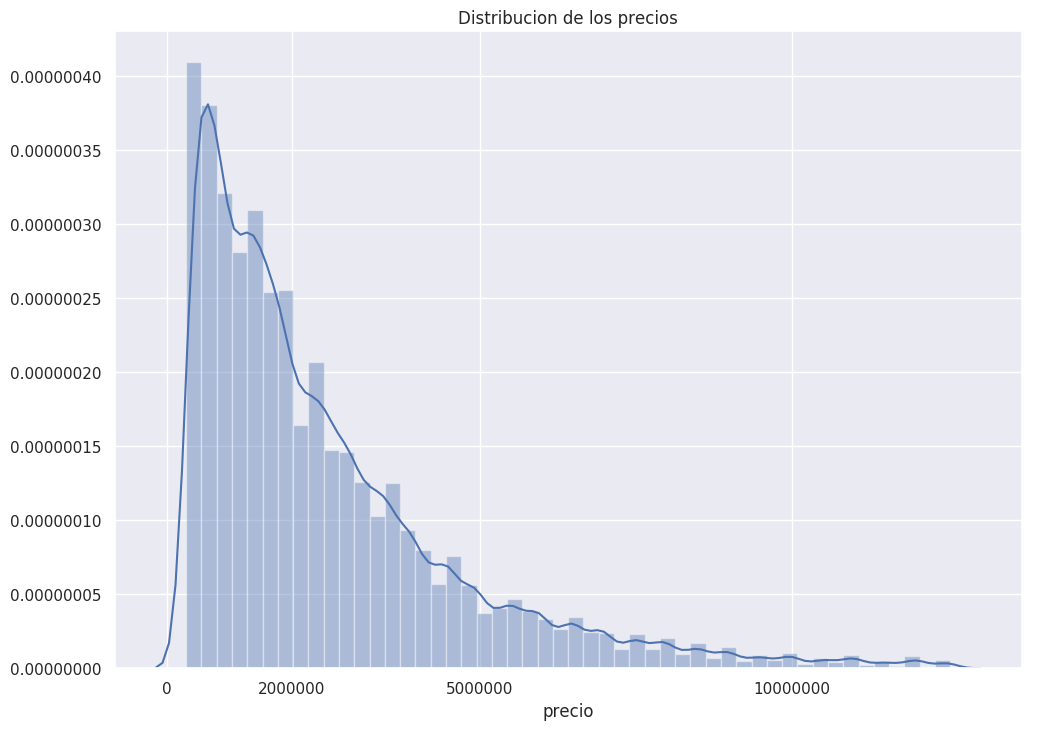

In [45]:
ax = plt.gca()
ax.get_xaxis().get_major_formatter().set_scientific(False)
ax.get_yaxis().get_major_formatter().set_scientific(False)
plot=sns.distplot(df['precio'])
plot.set_title("Distribucion de los precios")
plot.set(xticks=(0,2000000,5000000,10000000))



Divido en 3 grupos de precios:

    Grupo 1: menor a 2000000
    Grupo 2: entre 2000000 y 5000000
    Grupo 3: mayor a 5000000



In [0]:
df_1=df[df['precio']<2000000]

df_2=df[ (df['precio']>2000000) & (df['precio']<5000000) ]

df_3=df[(df['precio']>5000000)]

# 3.1 - [DESCRIPCIONES] ¿Las palabras de los titulos cambian segun el grupo?

In [0]:
#Funcion para contar palabras en una columna
from collections import Counter
def contar_palabras_en_columna(dataframe,columna):
    #Hacemos una lista con todas las palabras que aparecen en los titulos 
    #y sus apariciones, sacando los chars "( ) ,"
    contador_palabras_avisos = Counter(" ".join(map(str,dataframe[columna].\
    values.tolist())).lower().replace("(",'').replace(")",'').replace(",",' ').split(" ")).items()

    #Formo un DF con esa lista

    contador_palabras_avisos = list(contador_palabras_avisos)


    contador_palabras_avisos_df = pd.DataFrame(contador_palabras_avisos)
    contador_palabras_avisos_df.head()

    contador_palabras_avisos_df.columns=['palabra','apariciones']
    contador_palabras_avisos_df=contador_palabras_avisos_df.set_index('palabra')

    #Saco las palabras triviales del df (fui encontrandolas a medida que ploteaba los resultados)
    triviales=['','-','de','con','en','y','o','a','para','la','las','al','el','los','/','por','del','san','santa','0','1','2','3','4','que','se','un','una','dos','te','no','es','tu','su','muy','m2']
    contador_palabras_avisos_df=contador_palabras_avisos_df.drop(triviales)
    
    return contador_palabras_avisos_df.sort_values(by='apariciones',ascending=False)

In [48]:
datos=contar_palabras_en_columna(df,'titulo').head(18)
datos.head()

,apariciones
palabra,
casa,121164
venta,103775
departamento,37912
excelente,12197
lomas,11074


Text(0, 0.5, 'Palabras')

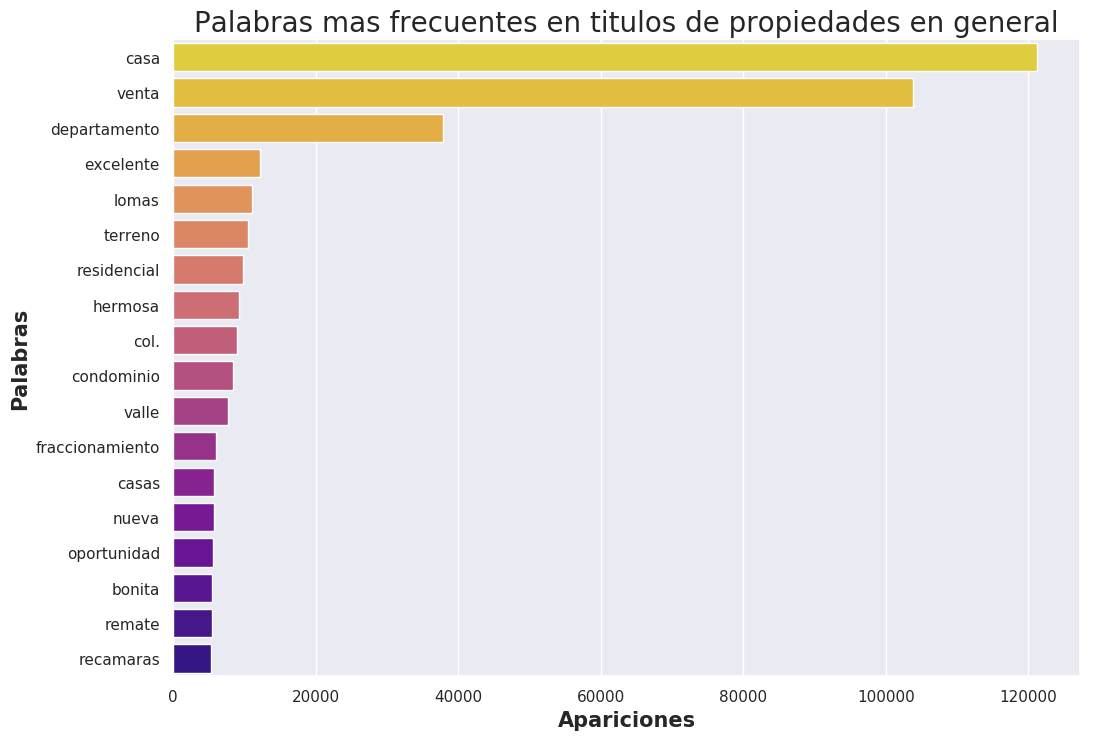

In [49]:
plot=sns.barplot(y=datos['apariciones'].index,x=datos['apariciones'].values,orient='h',palette="plasma_r")
plot.set_title('Palabras mas frecuentes en titulos de propiedades en general', fontsize = 20)
plot.set_xlabel('Apariciones', fontsize = 15, weight = 'bold')
plot.set_ylabel('Palabras', fontsize = 15, weight = 'bold')

# 3.1.0 - [DESCRIPCIONES] Variaciones en el GRUPO I (precios < 2000000)

In [0]:
datos=contar_palabras_en_columna(df_1,'titulo').head(18)

Text(0, 0.5, 'Palabras')

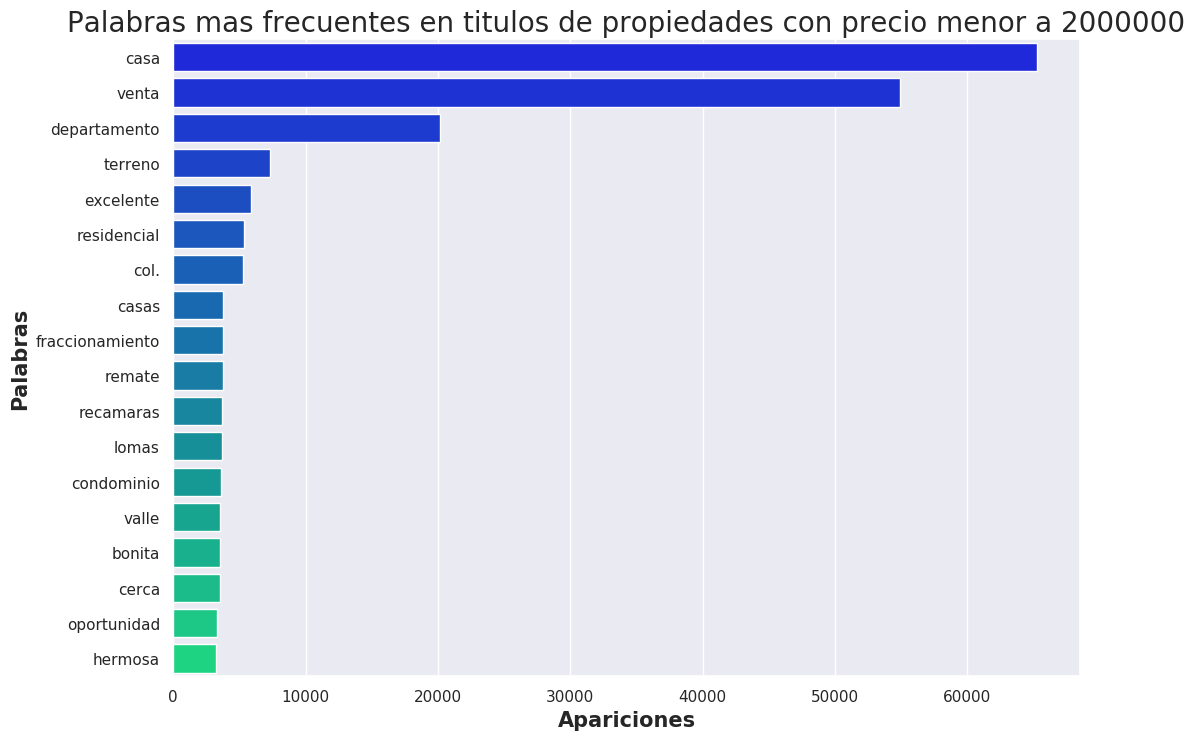

In [51]:
plot=sns.barplot(y=datos['apariciones'].index,x=datos['apariciones'].values,orient='h',palette="winter")
plot.set_title('Palabras mas frecuentes en titulos de propiedades con precio menor a 2000000', fontsize = 20)
plot.set_xlabel('Apariciones', fontsize = 15, weight = 'bold')
plot.set_ylabel('Palabras', fontsize = 15, weight = 'bold')

# 3.1.1 - [DESCRIPCIONES] Variaciones en el GRUPO II (2000000 < precios < 5000000)

In [0]:
datos=contar_palabras_en_columna(df_2,'titulo').head(18)

Text(0, 0.5, 'Palabras')

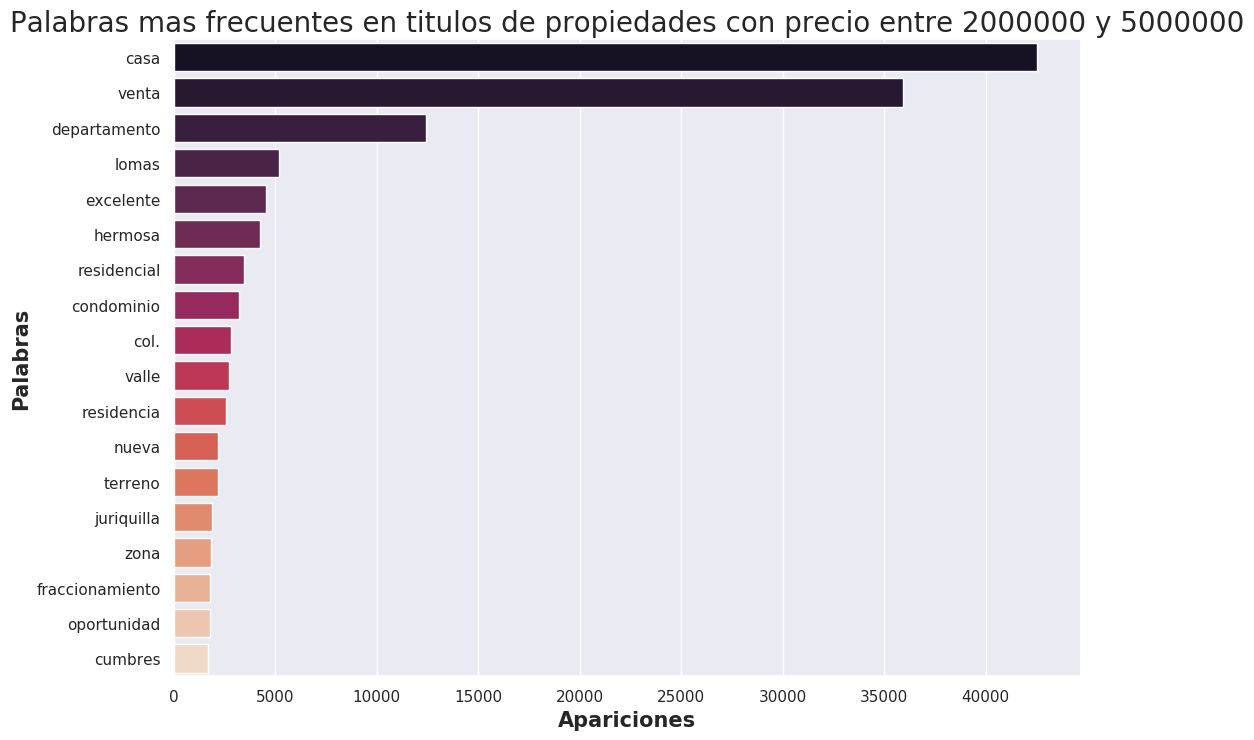

In [53]:
plot=sns.barplot(y=datos['apariciones'].index,x=datos['apariciones'].values,orient='h',palette="rocket")
plot.set_title('Palabras mas frecuentes en titulos de propiedades con precio entre 2000000 y 5000000', fontsize = 20)
plot.set_xlabel('Apariciones', fontsize = 15, weight = 'bold')
plot.set_ylabel('Palabras', fontsize = 15, weight = 'bold')

# 3.1.2 - [DESCRIPCIONES] Variaciones en el GRUPO III (precios > 5000000)

In [0]:
datos=contar_palabras_en_columna(df_3,'titulo').head(18)

Text(0, 0.5, 'Palabras')

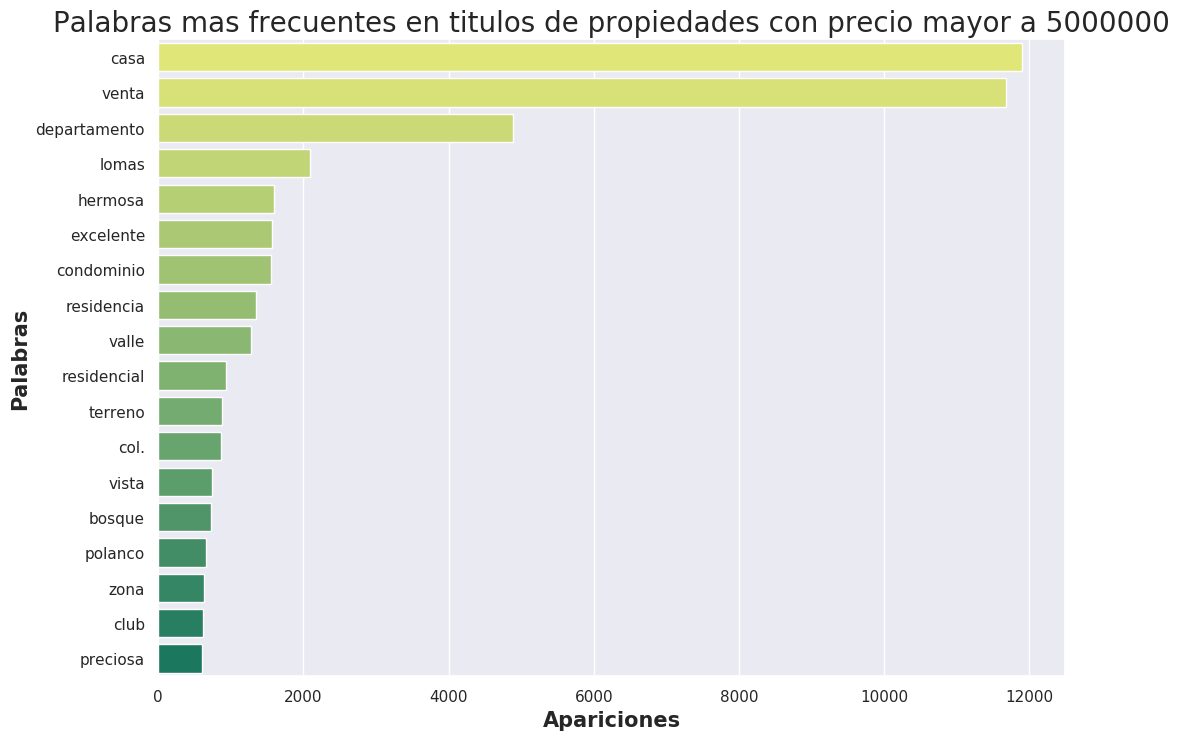

In [55]:
plot=sns.barplot(y=datos['apariciones'].index,x=datos['apariciones'].values,orient='h',palette="summer_r")
plot.set_title('Palabras mas frecuentes en titulos de propiedades con precio mayor a 5000000', fontsize = 20)
plot.set_xlabel('Apariciones', fontsize = 15, weight = 'bold')
plot.set_ylabel('Palabras', fontsize = 15, weight = 'bold')

# 3.2 - [DESCRIPCIONES] ¿Hay palabras que se repitan en descripciones de determinado grupo de propiedades?

In [0]:
datos=contar_palabras_en_columna(df,'descripcion').head(18)

Text(0, 0.5, 'Palabras')

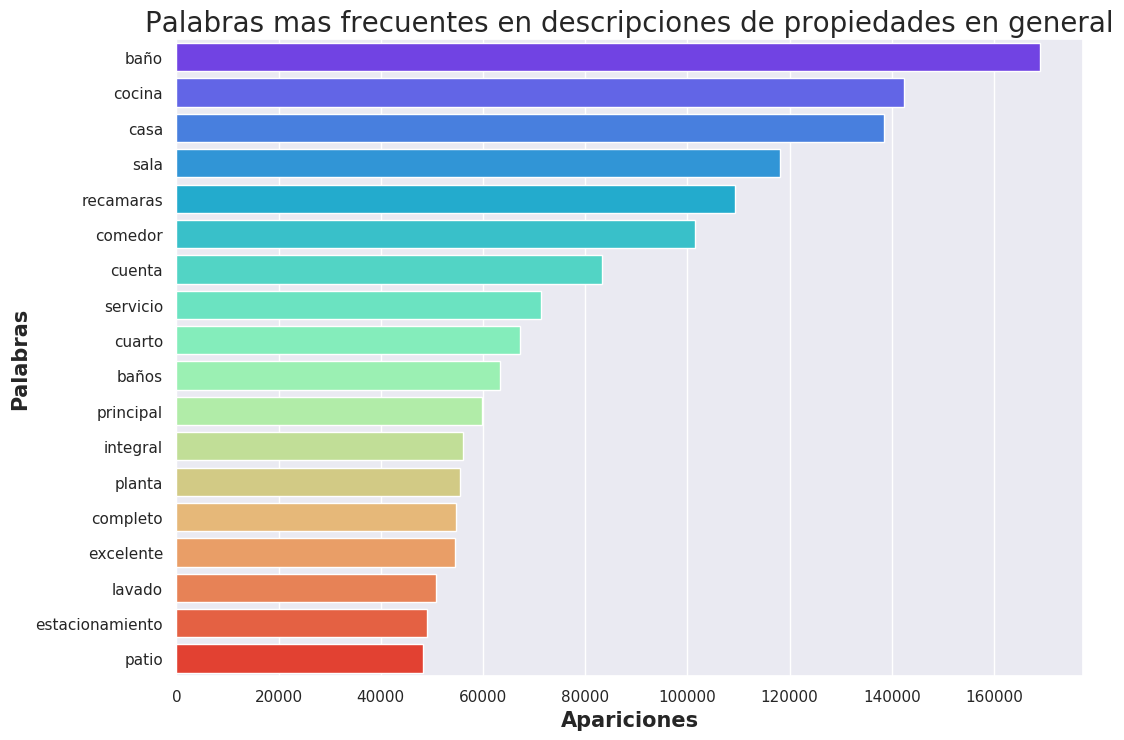

In [57]:
plot=sns.barplot(y=datos['apariciones'].index,x=datos['apariciones'].values,orient='h',palette="rainbow")
plot.set_title('Palabras mas frecuentes en descripciones de propiedades en general', fontsize = 20)
plot.set_xlabel('Apariciones', fontsize = 15, weight = 'bold')
plot.set_ylabel('Palabras', fontsize = 15, weight = 'bold')

# 3.2.0 - [DESCRIPCIONES] Frecuencias de palabras en GRUPO I 

In [0]:
datos=contar_palabras_en_columna(df_1,'descripcion').head(18)

Text(0, 0.5, 'Palabras')

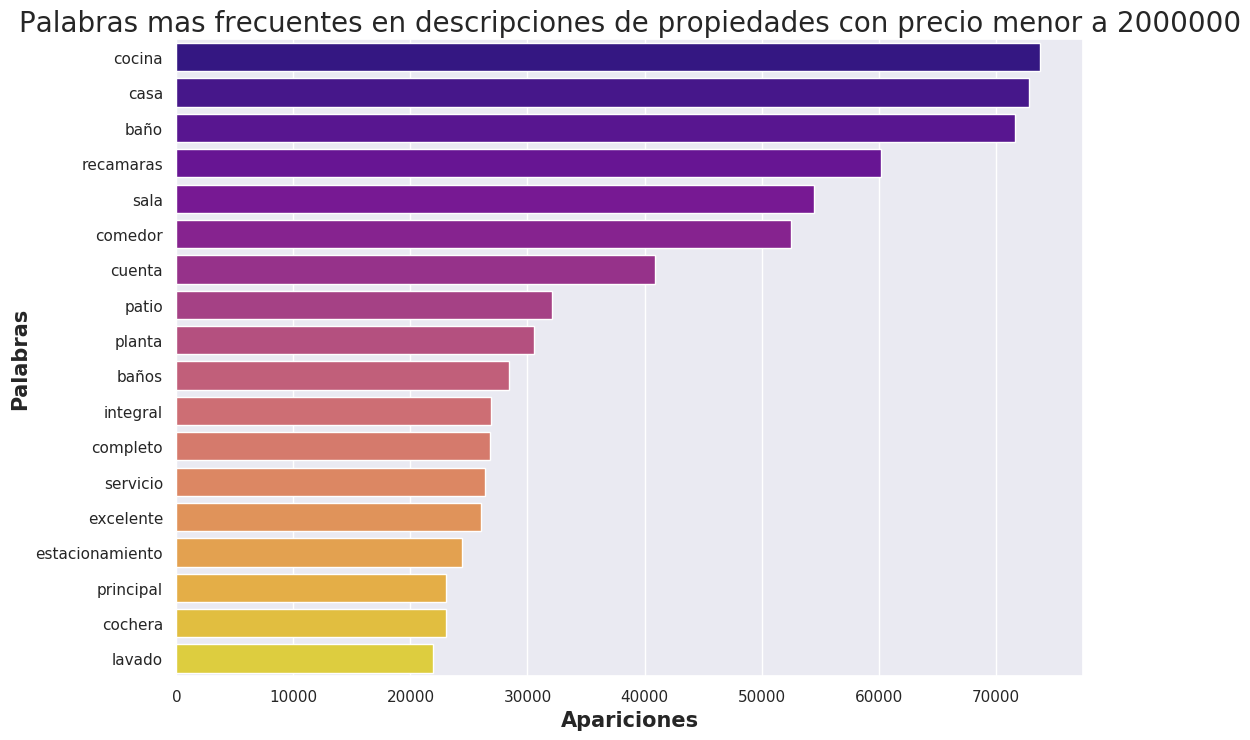

In [59]:
plot=sns.barplot(y=datos['apariciones'].index,x=datos['apariciones'].values,orient='h',palette="plasma")
plot.set_title('Palabras mas frecuentes en descripciones de propiedades con precio menor a 2000000', fontsize = 20)
plot.set_xlabel('Apariciones', fontsize = 15, weight = 'bold')
plot.set_ylabel('Palabras', fontsize = 15, weight = 'bold')

# 3.2.1 - [DESCRIPCIONES] Frecuencias de palabras en GRUPO II

In [0]:
datos=contar_palabras_en_columna(df_2,'descripcion').head(18)

Text(0, 0.5, 'Palabras')

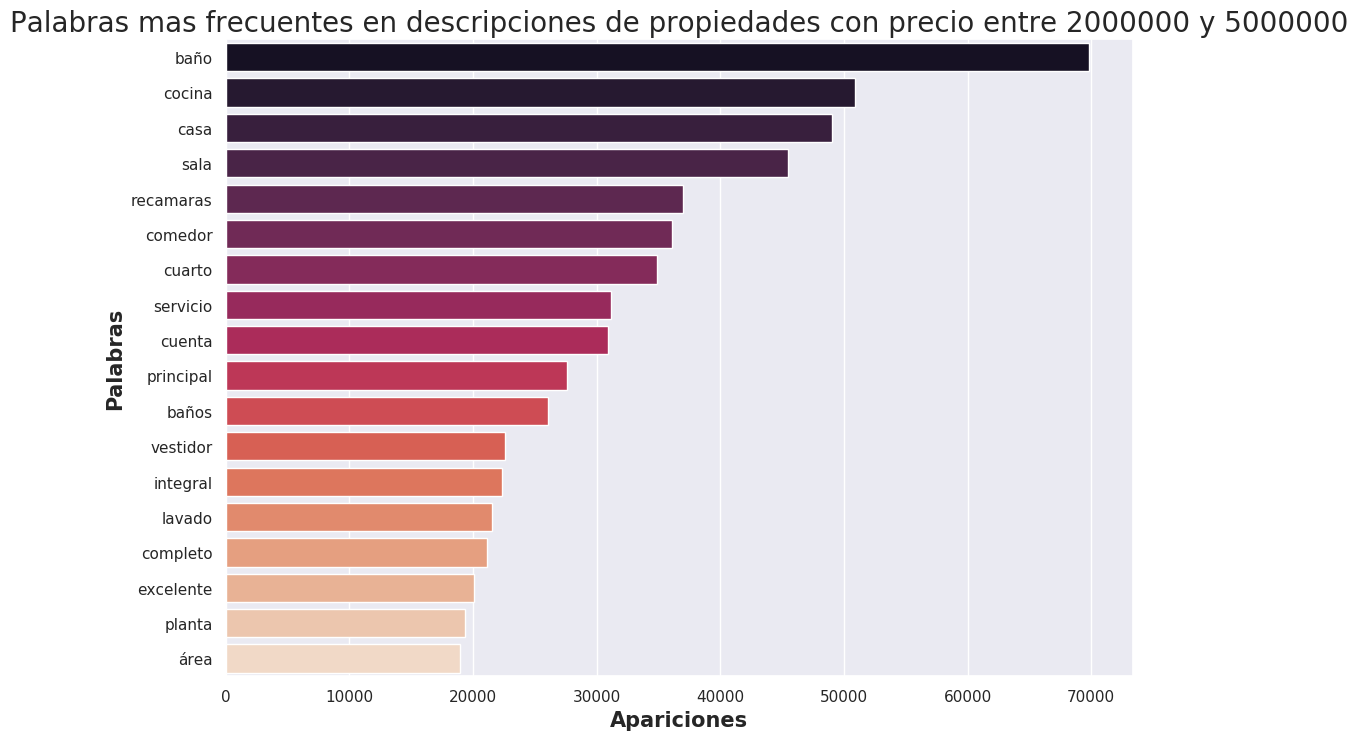

In [61]:
plot=sns.barplot(y=datos['apariciones'].index,x=datos['apariciones'].values,orient='h',palette="rocket")
plot.set_title('Palabras mas frecuentes en descripciones de propiedades con precio entre 2000000 y 5000000', fontsize = 20)
plot.set_xlabel('Apariciones', fontsize = 15, weight = 'bold')
plot.set_ylabel('Palabras', fontsize = 15, weight = 'bold')

# 3.2.0 - [DESCRIPCIONES] Frecuencias de palabras en GRUPO III

In [0]:
datos=contar_palabras_en_columna(df_3,'descripcion').head(18)

Text(0, 0.5, 'Palabras')

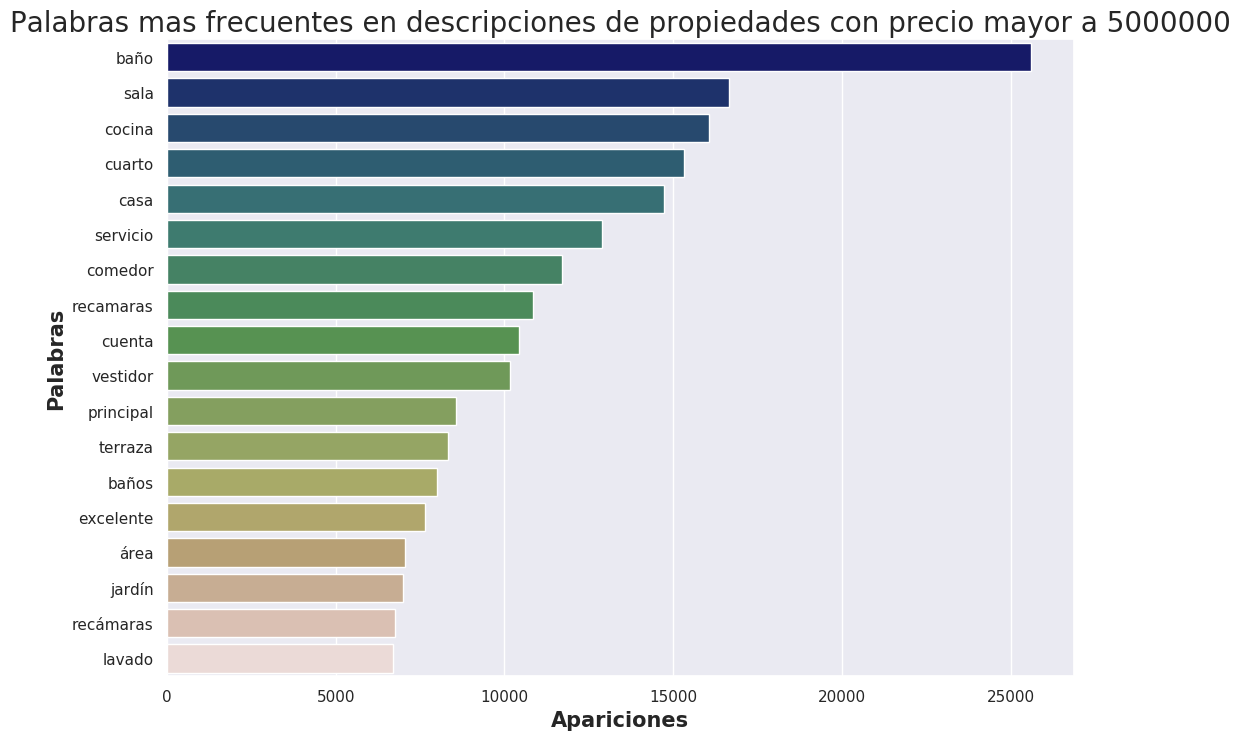

In [63]:
plot=sns.barplot(y=datos['apariciones'].index,x=datos['apariciones'].values,orient='h',palette="gist_earth")
plot.set_title('Palabras mas frecuentes en descripciones de propiedades con precio mayor a 5000000', fontsize = 20)
plot.set_xlabel('Apariciones', fontsize = 15, weight = 'bold')
plot.set_ylabel('Palabras', fontsize = 15, weight = 'bold')



***Conclusiones *** 

    La palabra 'baño' aparece masomenos en casi todas las propiedades sin importar el precio
    Idem para las palabras 'excelente' 'baños' 'servicio' 'cuenta' y 'lavado'
    Las palabras 'cocina' y 'casa' aparecen mucho mas en propiedades de precio menor a 2000000
    La palabra 'jardín' aparece mas seguido en propiedades de precio mayor a 5000000
    Las palabras 'patio' 'cochera' solo en las de precio menor a 2000000
    Las palabras 'vestidor' y 'cuarto' no aparecen significativamente en las de precio menor a 2000000 y si en el resto
    Las palabras 'estacionamiento' ' no tiene importancia en las de precio mayor a 5000000



# 3.3 - [DESCRIPCIONES] ¿Hay palabras que se caracterizan por aparecer en algun grupo en particular?

In [0]:
#Formo un df con todas las palabras que aparecen y su cantidad de apariciones
datos=contar_palabras_en_columna(df,'descripcion')

In [0]:
#Formo 3 dfs con las palabras que aparecen en cada grupo y su cantidad de apariciones dividido el tamaño del grupo
#Nota: Divido por el tamaño del grupo para evitar que un grupo mas grande que otro se acapare todo el porcentaje
# de cantidad de palabras. Quiero saber como se distribuyen las palabras en cada grupo pero teniendo en cuenta que los
# tamaños de cada uno son diferentes
datos_1=contar_palabras_en_columna(df_1,'descripcion')/df_1.shape[0]
datos_2=contar_palabras_en_columna(df_2,'descripcion')/df_2.shape[0]
datos_3=contar_palabras_en_columna(df_3,'descripcion')/df_3.shape[0]

In [0]:
datos_1.columns=['apariciones_en_grupo_1']
datos_2.columns=['apariciones_en_grupo_2']
datos_3.columns=['apariciones_en_grupo_3']

In [0]:
datos=datos.merge(datos_1,how='outer',right_index=True,left_index=True)
datos=datos.merge(datos_2,how='outer',right_index=True,left_index=True)
datos=datos.merge(datos_3,how='outer',right_index=True,left_index=True)

In [68]:
datos.head()

,apariciones,apariciones_en_grupo_1,apariciones_en_grupo_2,apariciones_en_grupo_3
palabra,,,,
a,1,NaN,0.000012,NaN
\t,260,0.000979,0.001201,0.001332
\t\t,10,0.000031,0.000025,0.000144
\t\t\t,10,0.000031,0.000049,0.000072
\t\t\t\t,2,NaN,0.000012,0.000036


In [69]:
datos.shape

(410644, 4)

In [70]:
datos[datos['apariciones']>=500].shape

(2136, 4)

**Se puede observar que pocas palabras se repiten mas de 500 veces. Me quedo con esas palabras**

In [0]:
datos=datos[datos['apariciones']>=500]

In [72]:
datos.head()

,apariciones,apariciones_en_grupo_1,apariciones_en_grupo_2,apariciones_en_grupo_3
palabra,,,,
\n,6102,0.027704,0.023380,0.021448
\n\n,1579,0.006783,0.006731,0.005434
\n\n*,1032,0.005389,0.003188,0.002879
\n\n-,1684,0.006564,0.007197,0.009141
\n\n2,989,0.004566,0.004095,0.002267


In [0]:
datos['total_apariciones']=datos['apariciones']
datos['apariciones']=(datos['apariciones_en_grupo_1']+datos['apariciones_en_grupo_2']+datos['apariciones_en_grupo_3'])

In [0]:
#Saco el porcentaje de apariciones de cada palabra en cada grupo (previamente habiendo tenido en cuenta
# que los tamaños de cada grupo son diferentes)
datos['apariciones_en_grupo_1']=datos['apariciones_en_grupo_1']/(datos['apariciones'])
datos['apariciones_en_grupo_2']=datos['apariciones_en_grupo_2']/(datos['apariciones'])
datos['apariciones_en_grupo_3']=datos['apariciones_en_grupo_3']/(datos['apariciones'])

In [75]:
datos.drop('apariciones',axis=1,inplace=True)
datos.head()

,apariciones_en_grupo_1,apariciones_en_grupo_2,apariciones_en_grupo_3,total_apariciones
palabra,,,,
\n,0.381953,0.322342,0.295705,6102
\n\n,0.357983,0.355229,0.286787,1579
\n\n*,0.470417,0.278266,0.251318,1032
\n\n-,0.286611,0.314253,0.399136,1684
\n\n2,0.417844,0.374700,0.207455,989


#3.3.0 - [DESCRIPCIONES] Palabras destacadas en el GRUPO I

Text(0, 0.5, 'Porcentaje de Apariciones')

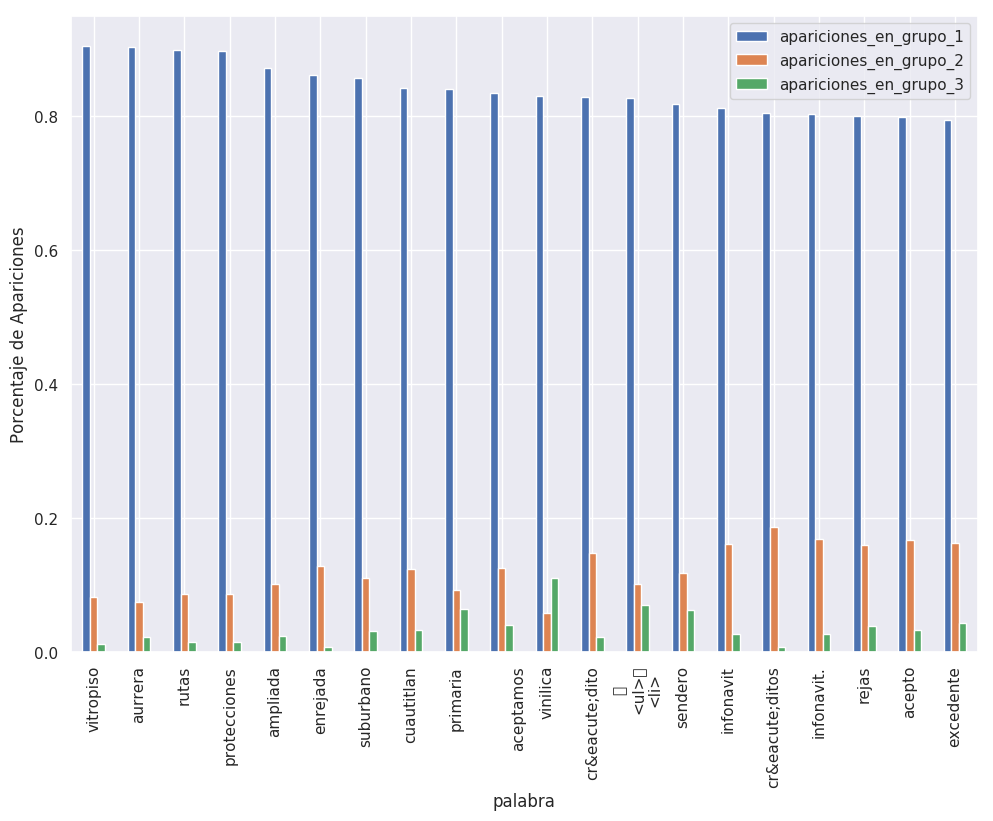

In [76]:
ax = datos.sort_values(by='apariciones_en_grupo_1',ascending=False).head(20).plot(kind='bar', y=["apariciones_en_grupo_1", "apariciones_en_grupo_2","apariciones_en_grupo_3"])
ax.set_ylabel('Porcentaje de Apariciones')

# 3.3.1 - [DESCRIPCIONES] Palabras destacadas en el GRUPO II

Text(0, 0.5, 'Porcentaje de Apariciones')

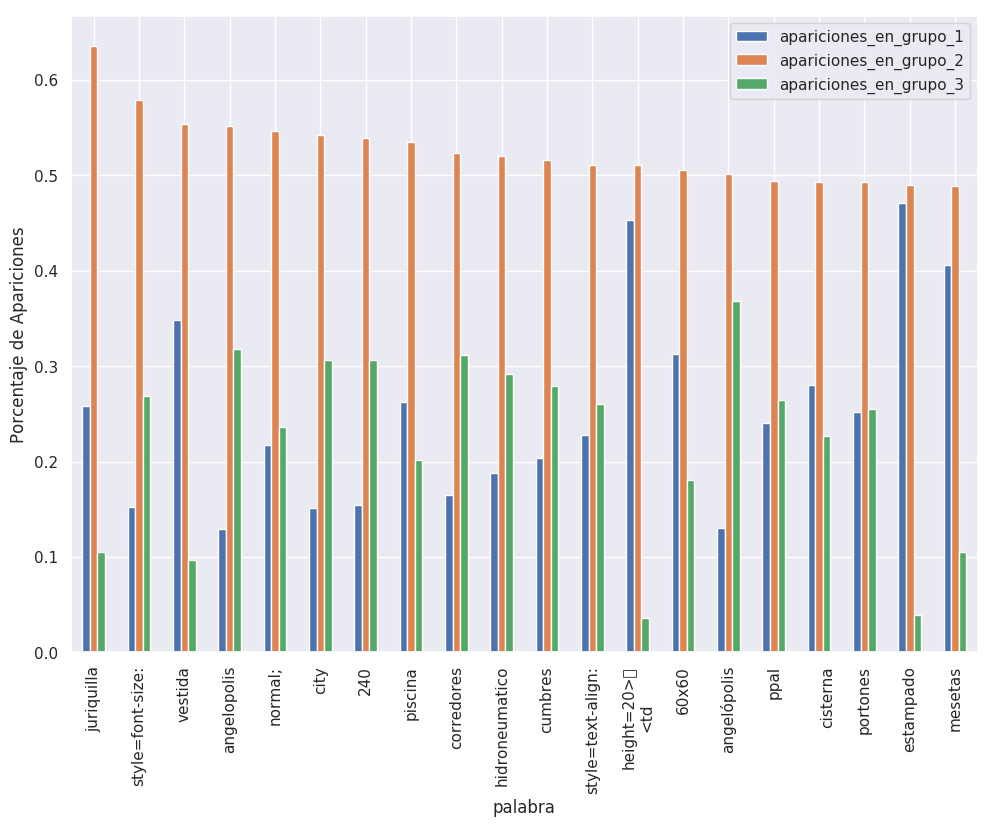

In [77]:
ax = datos.sort_values(by='apariciones_en_grupo_2',ascending=False).head(20).plot(kind='bar', y=["apariciones_en_grupo_1", "apariciones_en_grupo_2","apariciones_en_grupo_3"])
ax.set_ylabel('Porcentaje de Apariciones')

# 3.3.2 - [DESCRIPCIONES] Palabras destacadas en el GRUPO III

Text(0, 0.5, 'Porcentaje de Apariciones')

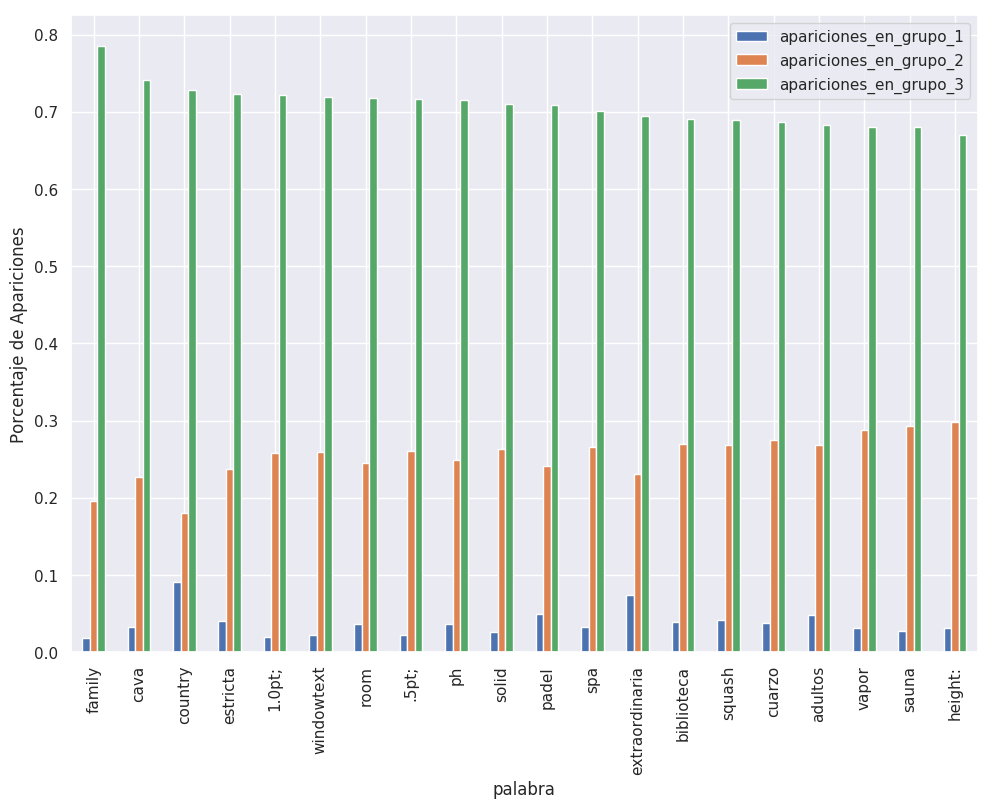

In [78]:
ax = datos.sort_values(by='apariciones_en_grupo_3',ascending=False).head(20).plot(kind='bar', y=["apariciones_en_grupo_1", "apariciones_en_grupo_2","apariciones_en_grupo_3"])
ax.set_ylabel('Porcentaje de Apariciones')

Estos graficos nos muestran que hay palabras que, cuando aparecen, suelen aparecer en grupos de propiedades con determinados precios. Las palabras que contiene la descripcion me pueden llegar a ayudar a determinar el precio de una propiedad

# 4.0 - [TEMPORALES] Análisis temporales

analizar todos los datos del dataframe de acuerdo a las fechas y ver qué cosas interesantes podemos observar, más alla de estudiar el comportamiento de los distintos features a través del tiempo.

In [79]:
df.fecha.min()

Timestamp('2012-01-01 00:00:00')

In [80]:
df.fecha.max()

Timestamp('2016-12-31 00:00:00')

In [81]:
df.fecha.head()

1   2013-06-28
2   2015-10-17
3   2012-03-09
4   2016-06-07
5   2014-03-18
Name: fecha, dtype: datetime64[ns]

In [82]:
#Extraigo el año
df['anio'] = df.fecha.dt.year
df.anio.head()

1    2013
2    2015
3    2012
4    2016
5    2014
Name: anio, dtype: int64

In [83]:
#Extraigo el mes
df['mes'] = df.fecha.dt.month
df.mes.head()

1     6
2    10
3     3
4     6
5     3
Name: mes, dtype: int64

In [84]:
#Extraigo el día
df['dia'] = df.fecha.dt.day
df.dia.head()

1    28
2    17
3     9
4     7
5    18
Name: dia, dtype: int64

# 4.1 - [TEMPORALES] Cantidad de publicaciones realizadas según el año

Cuento la cantidad de publicaciones realizadas según el año

In [85]:
dataXanio = df[['id', 'anio']].groupby('anio').agg('count').reset_index()
dataXanio.columns = ['año', 'cantidad_publicaciones']
dataXanio

,año,cantidad_publicaciones
0,2012,23534
1,2013,30386
2,2014,40572
3,2015,51469
4,2016,94038


In [86]:
dataXanio.dtypes

año                       int64
cantidad_publicaciones    int64
dtype: object

Text(0.5, 0, 'Año')

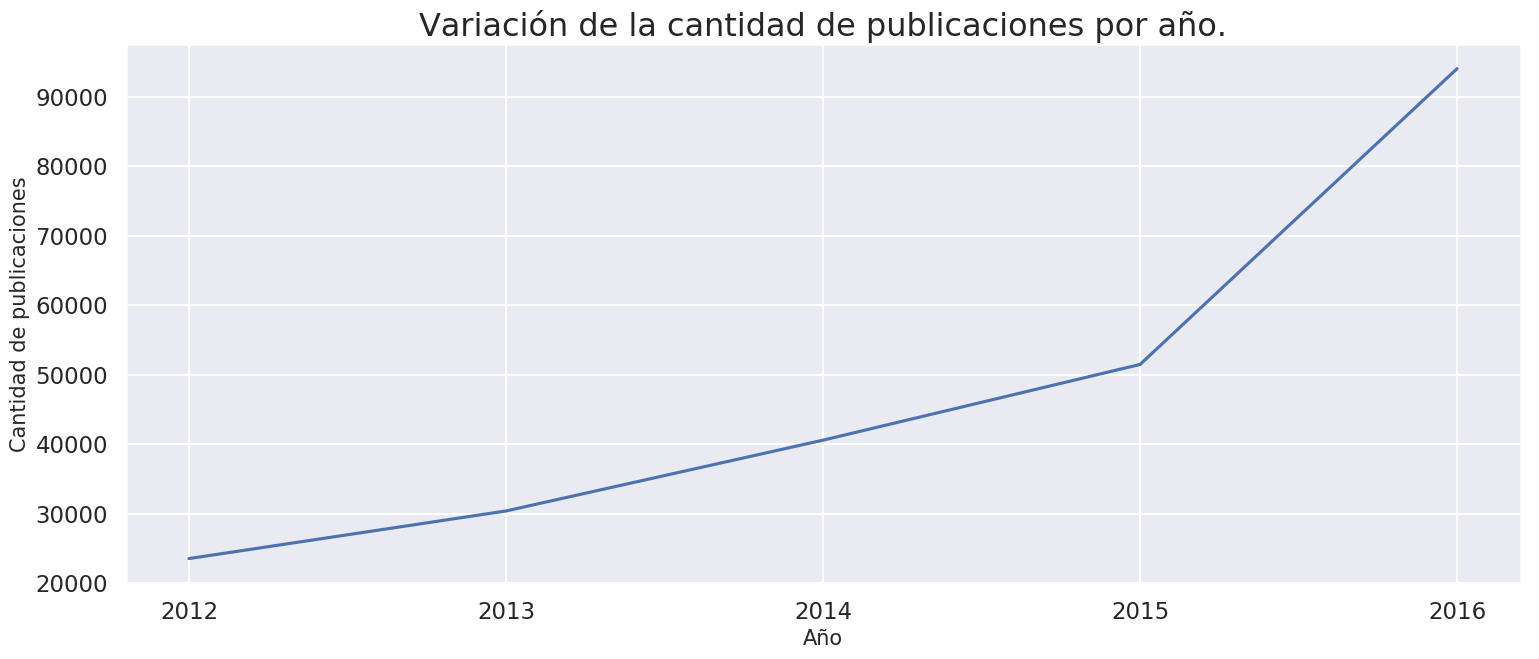

In [87]:
plt.figure(figsize = (18,7))
sns.set_style("darkgrid")
sns.set_context("talk")
pubsXanio = sns.lineplot(data = dataXanio, x = 'año', y = 'cantidad_publicaciones', palette = 'Set1')
pubsXanio.set_xticks([2012, 2013, 2014, 2015, 2016])
pubsXanio.set_title('Variación de la cantidad de publicaciones por año.', fontsize =  23)
pubsXanio.set_ylabel('Cantidad de publicaciones', fontsize = 15)
pubsXanio.set_xlabel('Año', fontsize = 15)

# 4.2 - [TEMPORALES] Variación de  publicaciones según los meses para cada año

In [0]:
dataXmes = df[['id', 'anio', 'mes']].groupby(['anio', 'mes']).agg('count')
dataXmes = dataXmes.unstack(0)
dataXmes.columns = ['2012', '2013', '2014', '2015', '2016']

In [89]:
dataXmes.head()

,2012,2013,2014,2015,2016
mes,,,,,
1,1528,1993,2403,4310,5775
2,1327,1401,2534,3869,4592
3,1103,1734,2916,3957,5022
4,1434,1829,2780,3783,6640
5,1857,2000,3071,3696,5438


In [90]:
dataXmes = dataXmes.reset_index()
dataXmes.head()

,mes,2012,2013,2014,2015,2016
0,1,1528,1993,2403,4310,5775
1,2,1327,1401,2534,3869,4592
2,3,1103,1734,2916,3957,5022
3,4,1434,1829,2780,3783,6640
4,5,1857,2000,3071,3696,5438


/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:1479: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_ylim(*args, **kwargs)


Text(0.5, 0.95, 'Variación de la cantidad de publicaciones según el mes para cada año.')

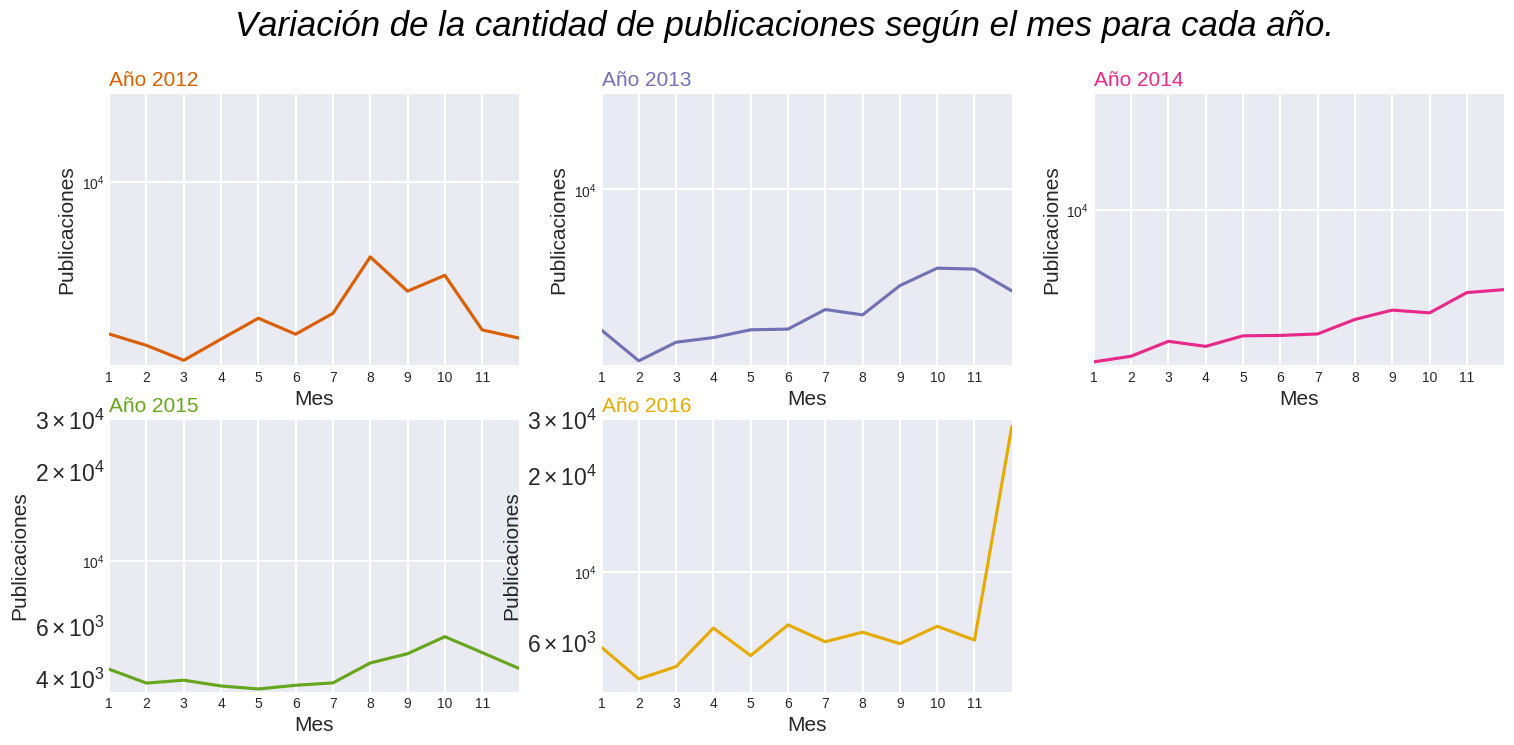

In [91]:
plt.figure(figsize = (18,12))
plt.style.use('seaborn-darkgrid')
palette = plt.get_cmap('Dark2')

for num, column in enumerate(dataXmes.drop('mes', axis=1)):
    
    num += 1
    plt.subplot(3,3, num)
    # Uso semilog para poder apreciar mejor el comportamiento de las lineas de cada año
    plt.semilogy(dataXmes['mes'], dataXmes[column], marker='', color=palette(num))
    #Todos los plots tienen los mismos límites
    plt.yticks(fontsize = 10)
    plt.xticks(list(range(1,12)), fontsize = 10)
    plt.xlim(1,12)
    plt.ylim(0,30000)
    # Título para cada plot
    plt.title("Año "+column, loc='left', fontsize=15, fontweight=0, color=palette(num))
    plt.xlabel('Mes', fontsize = 15)
    plt.ylabel('Publicaciones', fontsize = 15)
    
plt.suptitle("Variación de la cantidad de publicaciones según el mes para cada año.", fontsize = 25, color='black', style='italic', y=0.95)

Algo muy curioso en este gráfico es el crecimiento en aumento de publicaciones que se registra a partir del mes de noviembre del año 2016, es algo que llama la atención así que haremos más análisis sobre esto más adelante. Además es el único año que cierra al alza en las publicaciones, pues se observa que la tendencia en la mayoria de los años anteriores era la disminución de las publicaciones en los ultimos meses

# 4.3 - [TEMPORALES] Variación de  publicaciones según los meses para cada año (JUNTOS)

Text(0.5, 1.02, 'Variación de la cantidad de publicaciones según el mes para cada año.')

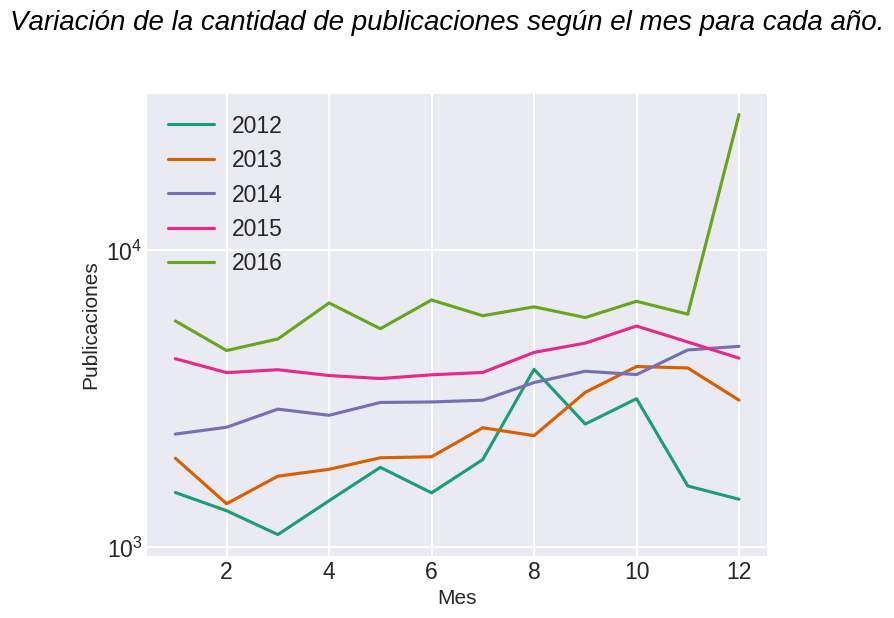

In [92]:
plt.figure(figsize = (8,6))
for i, j in  enumerate(dataXmes.iloc[:,1:].columns):
    plt.semilogy(dataXmes['mes'], dataXmes[j], marker='', color=palette(i))
plt.legend()
plt.xlabel('Mes', fontsize = 15)
plt.ylabel('Publicaciones', fontsize = 15)
plt.suptitle("Variación de la cantidad de publicaciones según el mes para cada año.", fontsize = 20, fontweight=0, color='black', style='italic', y=1.02)

# 4.4 - [TEMPORALES] Detalle el comportamiento de las publicaciones por día para el mes de noviembre del 2016

In [93]:
data_nov_2016 = df.loc[(df.mes == 11) & (df.anio == 2016), ['id', 'dia']].groupby('dia').agg('count').reset_index()
data_nov_2016.head()

,dia,id
0,1,254
1,2,131
2,3,129
3,4,278
4,5,177


Text(0, 0.5, 'Publicaciones')

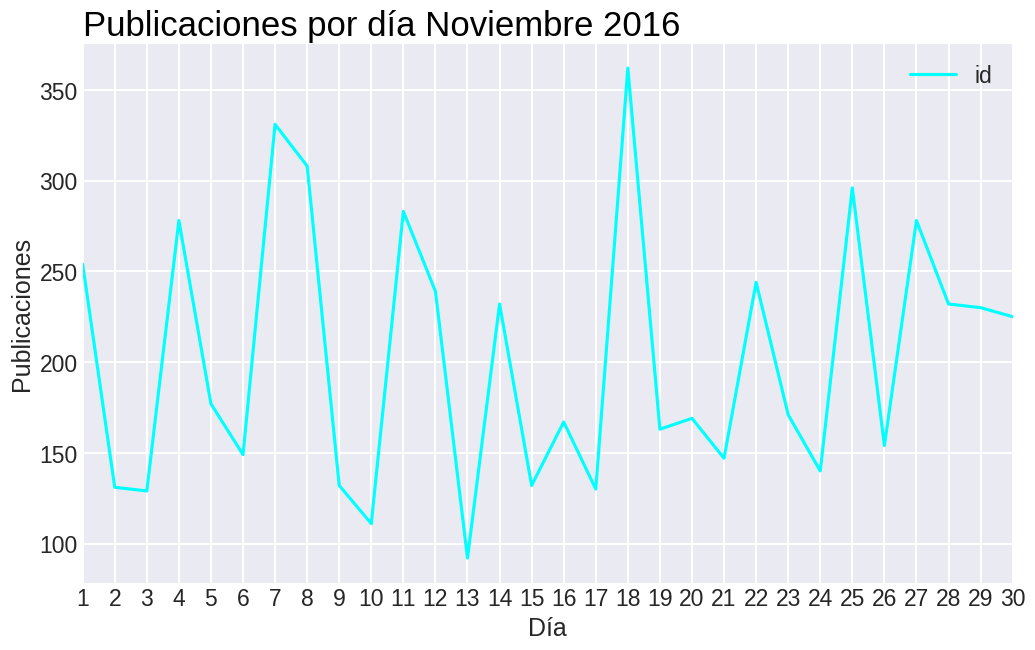

In [94]:
data_nov_2016.plot(x = 'dia', y = 'id', figsize = (12,7), xticks = list(range(1,31)), color = 'cyan')
plt.title("Publicaciones por día Noviembre 2016", loc='left', fontsize=25, fontweight=0, color='black')
plt.xlabel('Día')
plt.ylabel('Publicaciones')

Este gráfico realmente no aporta nada interesante ni que nos pueda dar un indicio para responder acerca del comportamiento de la variación de publicaciones, así que no lo tomaremos en cuenta.

# 4.5 - [TEMPORALES] Variacion del Precio a lo largo del tiempo

In [95]:
precio_por_anio = df[['anio', 'precio']].groupby('anio').agg('mean').reset_index()
precio_por_anio

,anio,precio
0,2012,2.032518e+06
1,2013,2.125061e+06
2,2014,2.364595e+06
3,2015,2.634577e+06
4,2016,2.801614e+06


Text(0, 0.5, 'Precio')

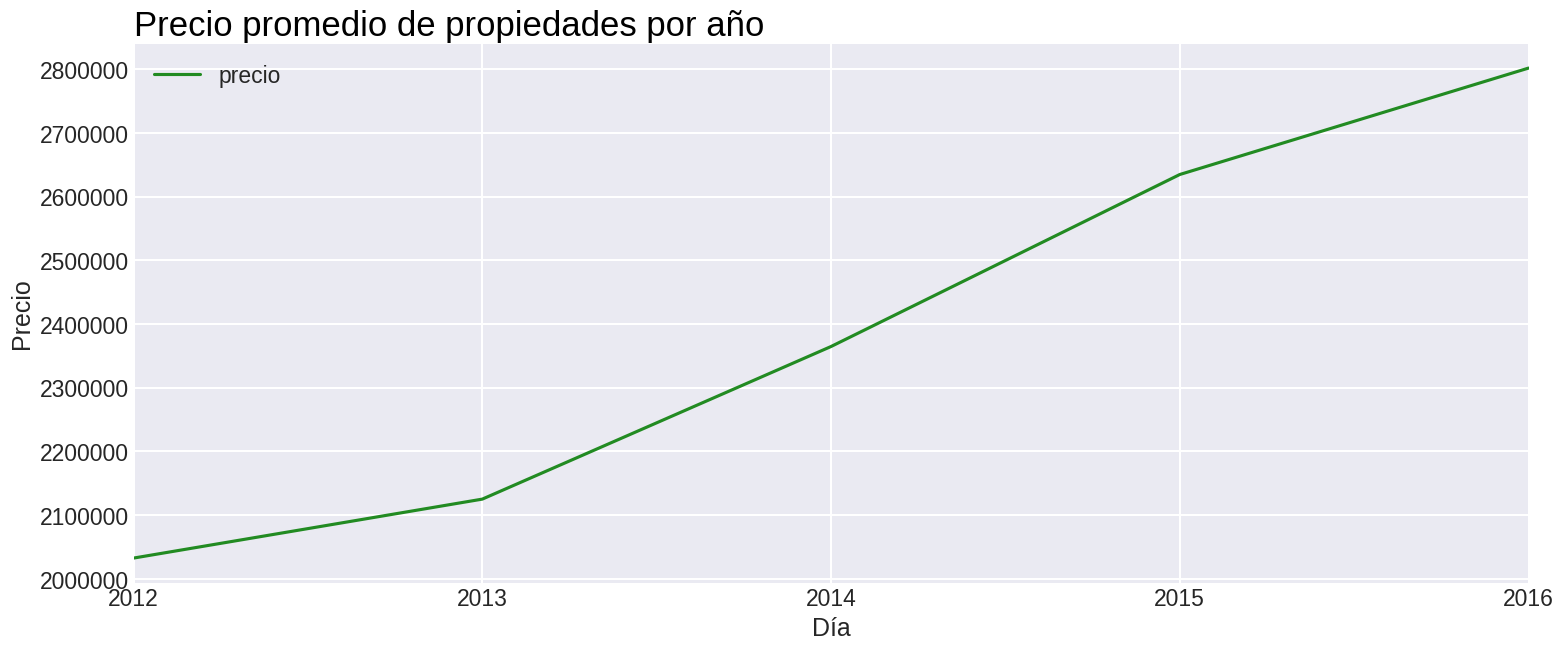

In [96]:
precio_por_anio.plot(x = 'anio', y = 'precio', figsize = (18,7), color = 'forestgreen', xticks = [2012,2013,2014,2015,2016])
plt.title("Precio promedio de propiedades por año", loc='left', fontsize=25, color='black')
plt.xlabel('Día', fontsize = 18)
plt.ylabel('Precio', fontsize = 18)

Vemos que los precios también van en aumento a los largo de los años. Veamoslo más detallado, a ver si podemos encontrar algo mas que podamos relacionar a la cantidad de publicaciones

# 4.6 - [TEMPORALES] Variación de los precios por mes según el año en que se encuentra

In [97]:
precios_mes_anio = df[['anio', 'mes', 'precio']].groupby(['anio', 'mes']).agg('mean').unstack(0).reset_index()
precios_mes_anio.columns = ['mes', 'precio2012', 'precio2013', 'precio2014', 'precio2015', 'precio2016']
precios_mes_anio

,mes,precio2012,precio2013,precio2014,precio2015,precio2016
0,1,1.910287e+06,2.032821e+06,2.194887e+06,2.399791e+06,2.688370e+06
1,2,1.817815e+06,2.158046e+06,2.327649e+06,2.367704e+06,2.695540e+06
2,3,1.966355e+06,2.092788e+06,2.268509e+06,2.602794e+06,2.807389e+06
3,4,2.167271e+06,2.164533e+06,2.360991e+06,2.520666e+06,2.827183e+06
4,5,1.899124e+06,2.119536e+06,2.312620e+06,2.643570e+06,2.726720e+06
5,6,1.930387e+06,2.058968e+06,2.357717e+06,2.734104e+06,2.744906e+06
6,7,1.827299e+06,2.221331e+06,2.358130e+06,2.779177e+06,2.882330e+06
7,8,2.116829e+06,2.197108e+06,2.345646e+06,2.654578e+06,2.880278e+06
8,9,2.092780e+06,2.112627e+06,2.430109e+06,2.778324e+06,2.918304e+06
9,10,2.228157e+06,2.178859e+06,2.262678e+06,2.712010e+06,2.825196e+06


Text(0.5, 0.95, 'Variación del precio de las propiedade según el mes para cada año.')

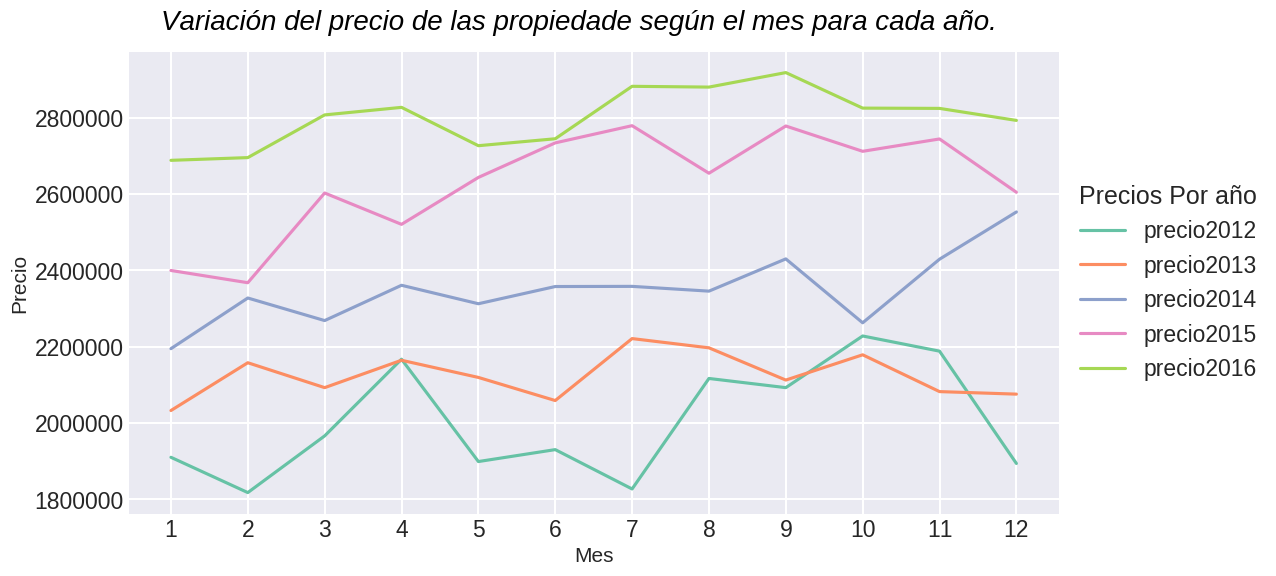

In [98]:
plt.figure(figsize = (12,6))
palette = plt.get_cmap('Set2')
for i, j in  enumerate(precios_mes_anio.iloc[:,1:].columns):
    plt.plot(precios_mes_anio['mes'], precios_mes_anio[j], marker='', color=palette(i))
plt.xticks(list(range(1,13)))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title = 'Precios Por año')
plt.xlabel('Mes', fontsize = 15)
plt.ylabel('Precio', fontsize = 15)
plt.suptitle("Variación del precio de las propiedade según el mes para cada año.", fontsize = 20, color='black', style='italic', y = 0.95)

# 4.7 - [TEMPORALES] Publicaciones por año para los tipos de propiedades más populares 

¿Cómo varía la oferta de propiedades según su tipo a lo largo del tiempo? ¿Tendrá esto algo que ver con el comportamiento de la variación de precios?

Veamos cuales son los tipos de propiedades más populares dependiendo del año en el que se publican

In [99]:
cant_publicaciones_tipo = df[['anio', 'tipodepropiedad', 'id']].groupby(['anio', 'tipodepropiedad']).agg('count').unstack(0)
cant_publicaciones_tipo.columns = ['2012', '2013', '2014', '2015', '2016']
#cant_publicaciones_tipo = cant_publicaciones_tipo.fillna(0).loc[cant_publicaciones_tipo.tipodepropiedad != 0]
#filtro los tipos que tengan al menos 100 publicaciones
cant_publicaciones_tipo = cant_publicaciones_tipo.loc[(cant_publicaciones_tipo['2012'] >= 100) & (cant_publicaciones_tipo['2013'] >= 100) & (cant_publicaciones_tipo['2014'] >= 100) & (cant_publicaciones_tipo['2015'] >= 100) & (cant_publicaciones_tipo['2016'] >= 100), :]
cant_publicaciones_tipo = cant_publicaciones_tipo.T
cant_publicaciones_tipo

tipodepropiedad,Apartamento,Bodega comercial,Casa,Casa en condominio,Edificio,Local Comercial,Oficina comercial,Terreno,Terreno comercial
2012,5071.0,139.0,13728.0,2835.0,172.0,109.0,163.0,951.0,113.0
2013,6716.0,158.0,19366.0,1960.0,193.0,328.0,209.0,1108.0,100.0
2014,9698.0,236.0,24299.0,3042.0,244.0,525.0,309.0,1540.0,289.0
2015,12779.0,327.0,29800.0,4095.0,317.0,718.0,358.0,2133.0,434.0
2016,23076.0,546.0,54524.0,7365.0,470.0,1375.0,702.0,4213.0,390.0


In [100]:
cant_publicaciones_tipo.columns

CategoricalIndex(['Apartamento', 'Bodega comercial', 'Casa',
                  'Casa en condominio', 'Edificio', 'Local Comercial',
                  'Oficina comercial', 'Terreno', 'Terreno comercial'],
                 categories=[0, 'Apartamento', 'Bodega comercial', 'Casa', 'Casa en condominio', 'Casa uso de suelo', 'Departamento Compartido', 'Duplex', ...], ordered=False, name='tipodepropiedad', dtype='category')

Text(0.5, 0.95, 'Publicaciones por año para los tipos de propiedades más populares')

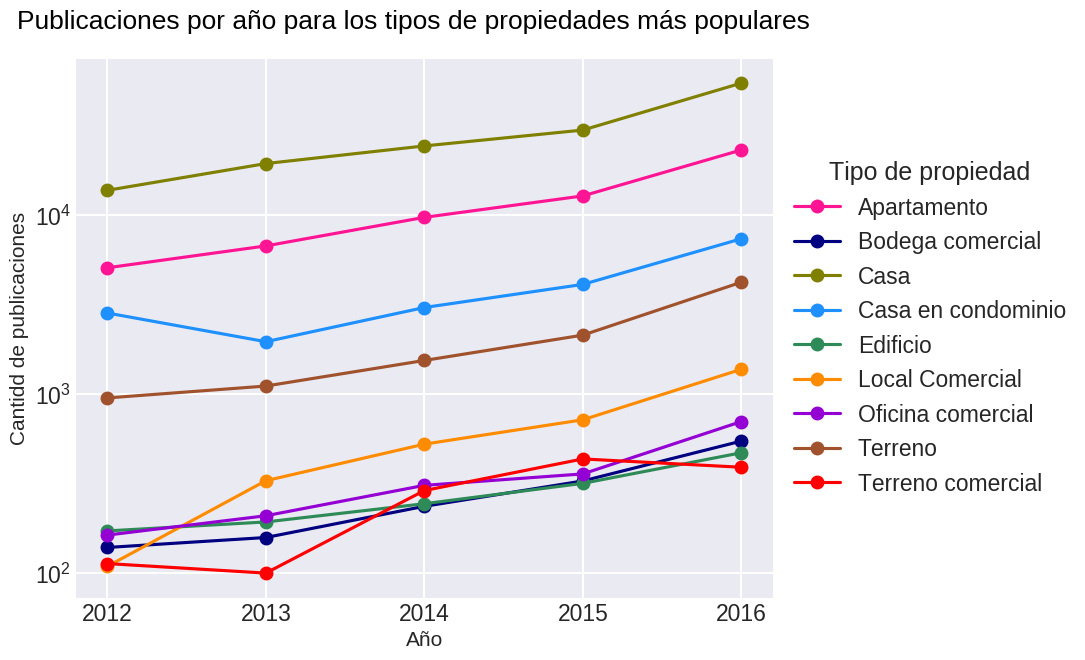

In [101]:
plt.figure(figsize = (9,7))
color = ['deeppink', 'navy', 'olive', 'dodgerblue', 'seagreen', 'darkorange', 'darkviolet', 'sienna', 'red', 'dimgray']
for i, j in  enumerate(cant_publicaciones_tipo.columns):
    plt.semilogy(cant_publicaciones_tipo.index, cant_publicaciones_tipo[j], color = color[i], marker = 'o')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title = 'Tipo de propiedad')
#plt.yticks(list(range(0,55000)))
plt.xlabel('Año', fontsize = 15)
plt.ylabel('Cantidd de publicaciones', fontsize = 15)
plt.suptitle("Publicaciones por año para los tipos de propiedades más populares", fontsize = 19, color='black', y = 0.95)

# 4.8 - [TEMPORALES] Precio promedio por año para los tipos de propiedades más populares 

In [102]:
#Utilizo los mismos tipos que utilice en el gráfico anterior
precio_por_tipo = df.loc[df.tipodepropiedad.isin(cant_publicaciones_tipo.columns), ['anio', 'tipodepropiedad', 'precio']].groupby(['anio', 'tipodepropiedad']).agg('mean').dropna()
precio_por_tipo = precio_por_tipo.unstack(1)
precio_por_tipo.columns = cant_publicaciones_tipo.columns
precio_por_tipo

tipodepropiedad,Apartamento,Bodega comercial,Casa,Casa en condominio,Edificio,Local Comercial,Oficina comercial,Terreno,Terreno comercial
anio,,,,,,,,,
2012,1.895032e+06,2.204930e+06,2.011125e+06,2.261724e+06,4.807669e+06,2.247376e+06,2.630736e+06,1.393834e+06,2.331124e+06
2013,2.219235e+06,2.616785e+06,2.026202e+06,2.693680e+06,4.927447e+06,2.060567e+06,2.389210e+06,1.411383e+06,2.078243e+06
2014,2.429907e+06,2.608754e+06,2.287626e+06,2.775549e+06,4.676060e+06,2.272543e+06,2.770284e+06,1.681164e+06,2.458178e+06
2015,2.965475e+06,2.818306e+06,2.475347e+06,2.983437e+06,4.788692e+06,2.336652e+06,3.420798e+06,1.798915e+06,2.112681e+06
2016,3.141786e+06,2.802626e+06,2.634788e+06,3.202797e+06,5.439087e+06,2.497192e+06,3.522474e+06,2.050155e+06,3.023964e+06


Text(0.5, 0.95, 'Precio promedio por año para los tipos de propiedades más populares')

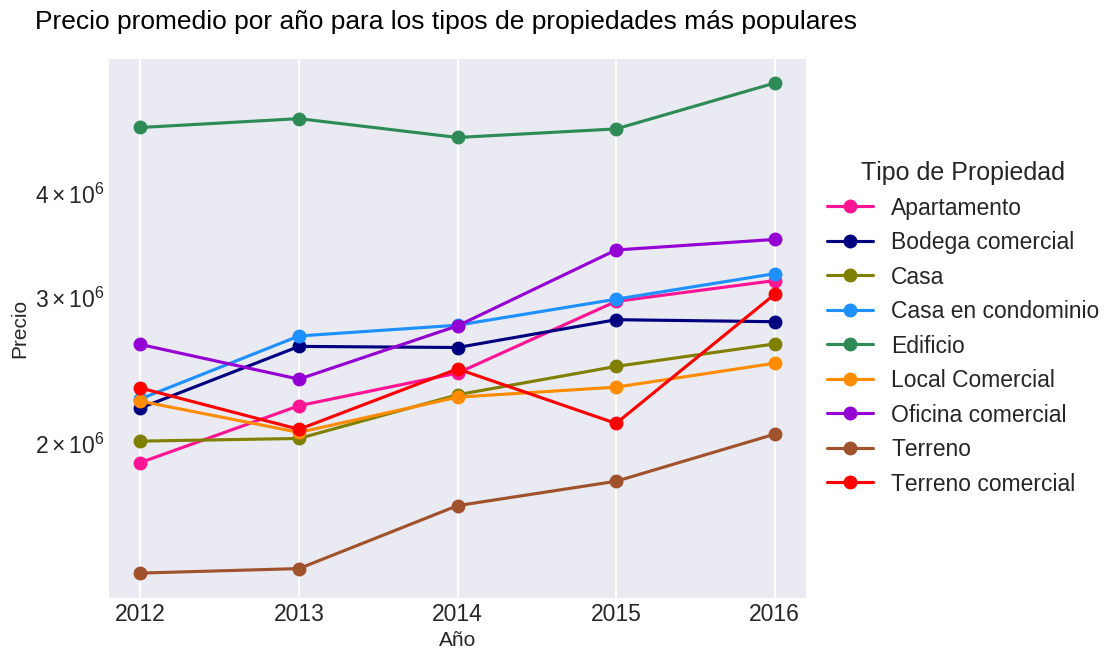

In [103]:


plt.figure(figsize = (9,7))
for i, j in  enumerate(precio_por_tipo.columns):
    plt.semilogy(precio_por_tipo.index, precio_por_tipo[j], color = color[i], marker = 'o')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title = 'Tipo de Propiedad')
plt.xticks([2012,2013,2014,2015,2016])
plt.xlabel('Año', fontsize = 15)
plt.ylabel('Precio', fontsize = 15)
plt.suptitle("Precio promedio por año para los tipos de propiedades más populares", fontsize = 19, color='black', y = 0.95)



# 4.9 - [TEMPORALES] ¿Cómo se comportan los metros de las propiedades a través del tiempo?

In [104]:
#Los valores 0 corresponden a valores nulos
df.metroscubiertos.isin([0]).value_counts()

False    222599
True      17400
Name: metroscubiertos, dtype: int64

In [105]:
df_metros = df.loc[:, ['fecha', 'metroscubiertos', 'metrostotales', 'id']]
df_metros.head()

,fecha,metroscubiertos,metrostotales,id
1,2013-06-28,268,180,53461
2,2015-10-17,144,166,247984
3,2012-03-09,63,67,209067
4,2016-06-07,95,95,185997
5,2014-03-18,75,90,126147


In [106]:
#tomo el año de las publicaciones
df_metros['año'] = df_metros.fecha.dt.year
df_metros.head()

,fecha,metroscubiertos,metrostotales,id,año
1,2013-06-28,268,180,53461,2013
2,2015-10-17,144,166,247984,2015
3,2012-03-09,63,67,209067,2012
4,2016-06-07,95,95,185997,2016
5,2014-03-18,75,90,126147,2014


# **4.9.0 - [TEMPORALES] Metros cubiertos en el tiempo**

In [107]:
df_mtrs_años = df_metros[df.metroscubiertos != 0].groupby(['año', 'metroscubiertos']).agg({'id': 'count'}).unstack(0)
df_mtrs_años.columns = ['2012','2013', '2014', '2015', '2016']
df_mtrs_años = df_mtrs_años.reset_index()
df_mtrs_años.head()

,metroscubiertos,2012,2013,2014,2015,2016
0,15,1.0,6.0,4.0,5.0,14.0
1,16,2.0,NaN,1.0,5.0,10.0
2,17,NaN,2.0,2.0,1.0,3.0
3,18,1.0,1.0,NaN,4.0,7.0
4,19,1.0,NaN,2.0,2.0,5.0


Text(0.5, 0.98, 'Variación de Metros cubiertos de propiedades según el mes para cada año.')

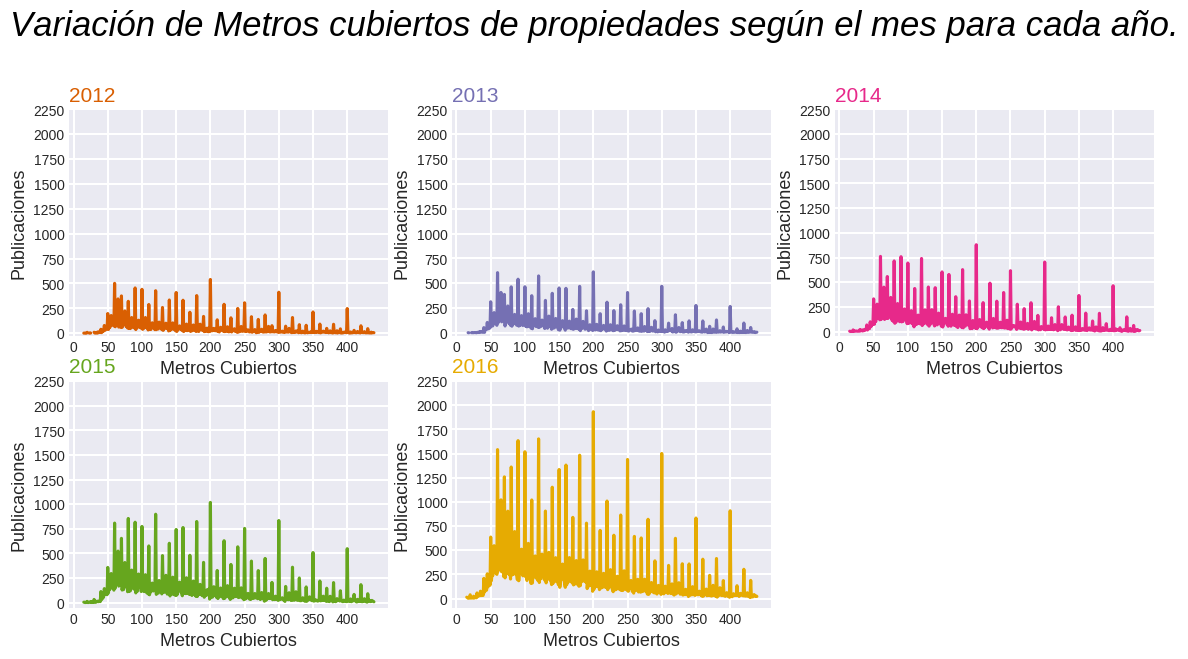

In [108]:
plt.figure(figsize = (14,10))
plt.style.use('seaborn-darkgrid')
palette = plt.get_cmap('Dark2')

for num, column in enumerate(df_mtrs_años.drop('metroscubiertos', axis=1)):
    
    num += 1
    plt.subplot(3,3, num)
    # Uso semilog para poder apreciar mejor el comportamiento de las lineas de cada año
    plt.plot(df_mtrs_años['metroscubiertos'], df_mtrs_años[column], marker='', color=palette(num))
    #Todos los plots tienen los mismos límites
    plt.yticks(list(range(0,2500, 250)), fontsize = 10)
    plt.xticks(list(range(0,450,50)),fontsize = 10)
    # Título para cada plot
    plt.title(column, loc='left', fontsize=15, fontweight=0, color=palette(num))
    plt.xlabel('Metros Cubiertos', fontsize = 13, fontweight=1)
    plt.ylabel('Publicaciones', fontsize = 13, fontweight=1)
    
plt.suptitle("Variación de Metros cubiertos de propiedades según el mes para cada año.", fontsize = 25, color='black', style='italic', y=0.98)

# 4.9.2 - [TEMPORALES] ¿Cómo se comportan los metros totales y cubiertos a través del tiempo? 

In [109]:


df_mtrs_totales= df_metros[df.metrostotales != 0].groupby(['año', 'metrostotales']).agg({'id': 'count'}).unstack(0)
df_mtrs_totales.columns = ['2012','2013', '2014', '2015', '2016']
df_mtrs_totales = df_mtrs_totales.reset_index()
df_mtrs_totales.head()



,metrostotales,2012,2013,2014,2015,2016
0,15,17.0,5.0,3.0,2.0,5.0
1,16,4.0,4.0,2.0,5.0,4.0
2,17,3.0,5.0,NaN,2.0,3.0
3,18,4.0,3.0,1.0,2.0,4.0
4,19,2.0,2.0,NaN,1.0,3.0


Text(0.5, 0.95, 'Metros Totales Vs. Metros Cubiertos para cada Año.')

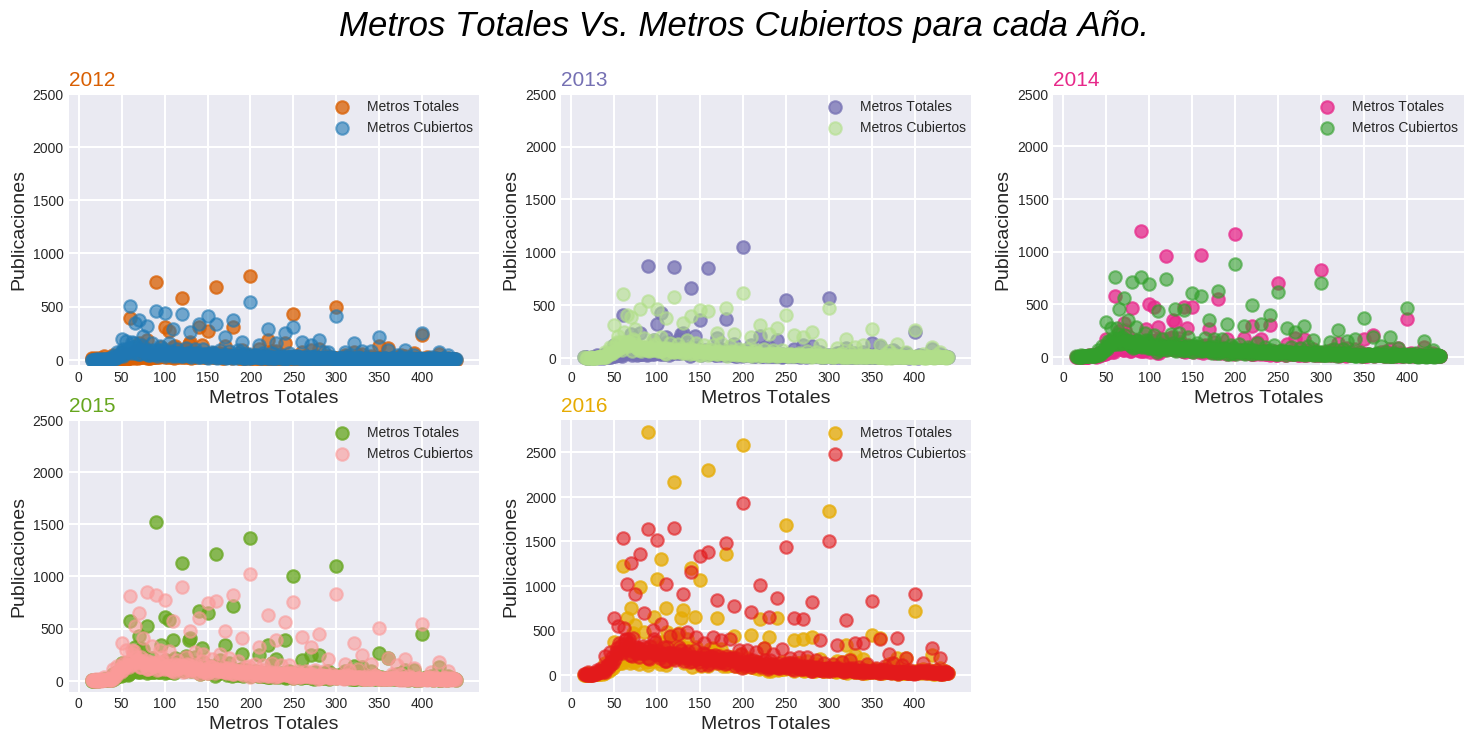

In [110]:
palette1 = plt.get_cmap('Dark2')
palette2 = plt.get_cmap('Paired')

plt.figure(figsize=(18,12))
for num, column in enumerate(df_mtrs_totales.drop('metrostotales', axis=1)):
    
    num += 1
    plt.subplot(3,3, num)
    # Uso semilog para poder apreciar mejor el comportamiento de las lineas de cada año
    plt.scatter(df_mtrs_totales['metrostotales'], df_mtrs_totales[column], color=palette1(num), alpha = 0.75)
    plt.scatter(df_mtrs_años['metroscubiertos'], df_mtrs_años[column], color=palette2(num), alpha = 0.6)
    #Todos los plots tienen los mismos límites
    plt.yticks(list(range(0,3000, 500)), fontsize = 10)
    plt.xticks(list(range(0,450,50)),fontsize = 10)
    # Título para cada plot
    plt.title(column, loc='left', fontsize=15, fontweight=0, color=palette(num))
    plt.xlabel('Metros Totales', fontsize = 14, fontweight=1)
    plt.ylabel('Publicaciones', fontsize = 14, fontweight=1)
    plt.legend(labels = ('Metros Totales', 'Metros Cubiertos'), fontsize = 10, borderaxespad = 0)
    
plt.suptitle("Metros Totales Vs. Metros Cubiertos para cada Año.", fontsize = 25, color='black', style='italic', y=0.95)

**Conclusión Parcial**

Como ya hemos visto anteriormente la cantidad de publicaciones aumenta a través del tiempo, no es nada nuevo para nosotros, por lo que nos enfocamos en el comportamiento de los metros cubiertos y totales. En general se observa que el comportamiento de los metros totales y metros cubiertos es parecido, se distribuyen entre los mismos valores. En todos los años se observa un pequeño pico hacía arriba entre las porpiedades entre 50 y metros, por lo que podría decirse que son los más populares. 
También vemos un aglutinamiento de puntos acercandose al aje x, esto quiere decir que a medida que la cantidad de publicaciones disminuye, la viabilidad en los metros aumenta, ya sean cubiertos o totales, esto claramente parece estar relacionado con "la ecuación más peligrosa de la historia", puesto que tenemos frente a pocos datos, mayor variabilidad en los valores.
En general vemos que los valores para los metros cubiertos tienen un comportamiento bastante uniforme en la mayoría de los gráficos, a diferencia de los metros totales que suele registrar puntos con popularidades más altas, en general entre los 100 y 200 metros.
Por último en el gráfico correspondiente al año 2016 podemos observar que las popularidades aumentan abruptamente en comparación al resto de los años, como hemos visto esto se debe a la suba de la cantidad de publicaciones registradas para ese año, observamos que ahora los metros entre 50 y 300 recibieron una gran cantidad de publicaciones, por lo que diremos que se han vuelto más populares.